In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bdtcode.histogramming as H
import glob
import mplhep as hep

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# This npz files are made by running npz_saver.ipynb code
# the original npz files have these selection cuts:
#  1- RTx < 1.15 --> this should be changed to RTx < 1.005 ( slide# )
#  1- no lepton veto

In [4]:
# Loading MC npz files

#qcd_bin = (list(np.load('npzfiles/qcd_bin'+str(n) +'.npz') for n in range(0,9)))
qcd_bin = (list(np.load('qcd_bin'+str(n) +'.npz') for n in range(0,9)))
ttjet_bin = (list(np.load('npzfiles/ttjet_bin'+str(n) +'.npz') for n in range(0,8)))
wjet_bin  = (list(np.load('npzfiles/wjet_bin'+str(n) +'.npz') for n in range(0,5)))
zjet_bin  = (list(np.load('npzfiles/zjet_bin'+str(n) +'.npz') for n in range(0,5)))


# Loading data_prehem npz files
data_prehem = (list(np.load('npzfiles/data_prehem_run'+str(n) +'.npz') for n in ('A','B')))


In [5]:
# Computing weights
# Computing MC weights:
#  1-preselection efficiencies 

qcd_sel_eff = (list(qcd_bin[n]['preselection']/qcd_bin[n]['total'] for n in range(0,9)))
ttjet_sel_eff = (list(ttjet_bin[n]['preselection']/ttjet_bin[n]['total'] for n in range(0,8)))
wjet_sel_eff = (list(wjet_bin[n]['preselection']/wjet_bin[n]['total'] for n in range(0,5)))
zjet_sel_eff = (list(zjet_bin[n]['preselection']/zjet_bin[n]['total'] for n in range(0,5)))

#  2-number of events passing from preselection efficiencies
qcd_pass   = (list(qcd_bin[n]['preselection'] for n in range(0,9)))
ttjet_pass = (list(ttjet_bin[n]['preselection'] for n in range(0,8)))
wjet_pass  = (list(wjet_bin[n]['preselection'] for n in range(0,5)))
zjet_pass  = (list(zjet_bin[n]['preselection'] for n in range(0,5)))

#  3-Compute data_prehem luminosity to weight MC
#    lumi runA + runB ( from https://twiki.cern.ch/twiki/bin/viewauth/CMS/
#    RA2b13TeVProduction#Dataset_luminosities_2018_pb_1)
prehem_lumi = 14026.948 + 7044.413 

#  5-MC XSec
qcd_crossections = np.array([7823, 648, 186.9, 32.293, 9.4183, 0.84265, 0.114943, 0.00682981, 0.000165445])#reference: SVJ AN note
ttjet_crossections = np.array([88.34, 182.72, 182.72, 831.76, 2.685, 1.096, 0.194, 0.002]) #reference: https://github.com/boostedsvj/svj-bdt/blob/merged/bdtcode/crosssections.py
zjet_crossections = np.array([9.921*1.1347, 2.409*1.1347, 1.078*1.1347, 0.2514*1.1347, 0.005614*1.1347])#reference: https://github.com/boostedsvj/svj-bdt/blob/merged/bdtcode/crosssections.py
wjet_crossections = np.array([45.25*1.139, 10.97*1.139, 4.933*1.139, 1.16*1.139, 0.02627*1.139])#reference: https://github.com/boostedsvj/svj-bdt/blob/merged/bdtcode/crosssections.py

#  6-Compute weight
qcd_weight   = qcd_crossections   *qcd_sel_eff   * prehem_lumi / qcd_pass
ttjet_weight = ttjet_crossections *ttjet_sel_eff * prehem_lumi / ttjet_pass
wjet_weight  = wjet_crossections  *wjet_sel_eff  * prehem_lumi / wjet_pass
zjet_weight  = zjet_crossections  *zjet_sel_eff  * prehem_lumi / zjet_pass

# data_prehem weights is equal to one
# number of events of runA, B should be added together


In [99]:
# add data_prehem 2018 runA, B
# compute centre of bins 

bins = np.linspace(0, 4000, 100)

data_pt_values =   [data_prehem[n]['pt'] for n in range(0,2)]
data_labels = ['Run2018A', 'Run2018B']


val_data_pt, data_edges_pt, patches_data_pt = plt.hist(data_pt_values, bins, stacked=True, histtype='step', label=data_labels)
plt.close()

data_pt_centre = (data_edges_pt[1:]+data_edges_pt[:-1])/2
data_pt_stacked = val_data_pt[1]

In [6]:
# add all MC (qcd, ttjets, wjets, zjets) npz files in one big array --> mc_pt_values
# mc_pt_values array has 4 elements, and each elements has several bins
# mc_weights_arr is the weight that should be applied on histogramming

labels_qcd=['PT300to470','PT470to600','PT600to800','PT800to1000', 'PT1000to1400', 'PT1400to1800', 'PT1800to2400', 'PT2400to3200', 'PT3200toInf']
labels_ttjet=['DiLept', 'SingleLeptFromTbar', 'SingleLeptFromT', 'TuneCP5', 'HT-600To800','HT-800To1200','HT-1200To2500', 'HT-2500ToInf']
labels_wjet=['HT-400To600','HT-600To800','HT-800To1200','HT-1200To2500', 'HT-2500ToInf']
labels_zjet=['HT-400To600','HT-600To800','HT-800To1200','HT-1200To2500', 'HT-2500ToInf']


qcd_pt_values =   [qcd_bin[n]['pt'] for n in range(0,9)]
ttjet_pt_values = [ttjet_bin[n]['pt'] for n in range(0,8)]
wjet_pt_values =  [wjet_bin[n]['pt'] for n in range(0,5)]
zjet_pt_values =  [zjet_bin[n]['pt'] for n in range(0,5)]

qcd_label    = [labels_qcd[n] for n in range(0,9)]
ttjet_label  = [labels_ttjet[n] for n in range(0,8)]
wjet_label   = [labels_wjet[n] for n in range(0,5)]
zjet_label   = [labels_zjet[n] for n in range(0,5)]

qcd_weights_arr   = [np.ones_like(qcd_bin[n]['pt'])*qcd_weight[n] for n in range(0,9)]
ttjet_weights_arr = [np.ones_like(ttjet_bin[n]['pt'])*ttjet_weight[n] for n in range(0,8)]
wjet_weights_arr  = [np.ones_like(wjet_bin[n]['pt'])*wjet_weight[n] for n in range(0,5)]
zjet_weights_arr  = [np.ones_like(zjet_bin[n]['pt'])*zjet_weight[n] for n in range(0,5)]

mc_pt_values = [qcd_pt_values, ttjet_pt_values, wjet_pt_values, zjet_pt_values]
mc_labels = [qcd_label, ttjet_label, wjet_label, zjet_label]
mc_weights_arr = [qcd_weights_arr, ttjet_weights_arr, wjet_weights_arr, zjet_weights_arr]



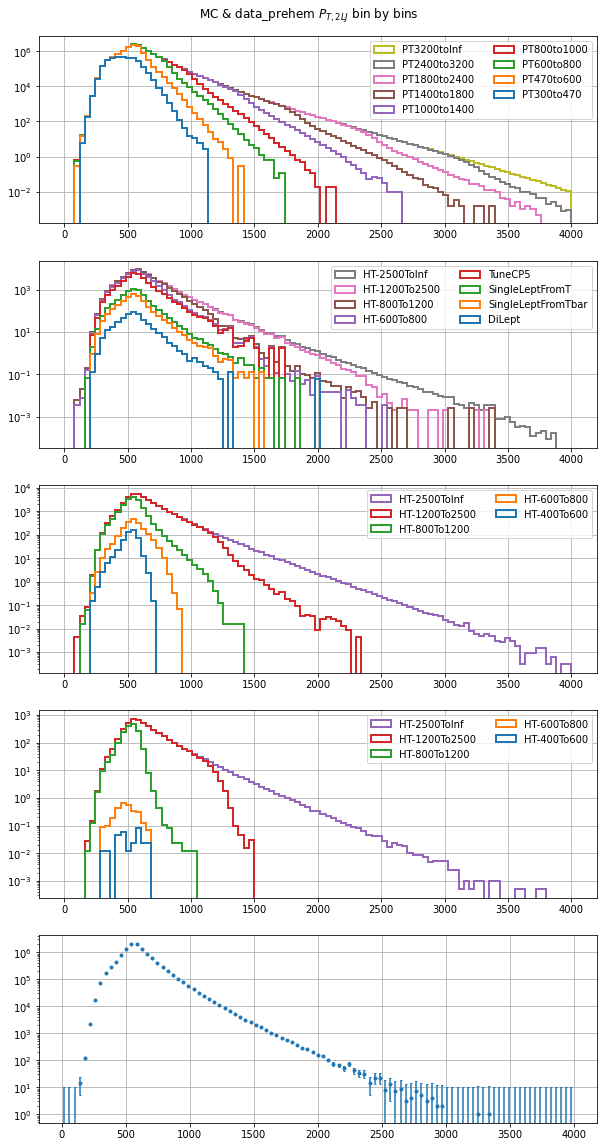

In [9]:
# plot stacked PT_2LJ histograms 
# MC (qcd, ttjets, wjets, zjets) and data 
# the peak in MC sources and data is in PT~500 (GeV)

fig, ax = plt.subplots(5, 1, figsize=(10,20))
fig.suptitle('MC & data_prehem $P_{T,2LJ}$ bin by bins', y=0.9)
bins = np.linspace(0, 4000, 100)

for i in range(0,4):
    ax[i].hist(mc_pt_values[i], bins, stacked=True, histtype = 'step', label = mc_labels[i], weights = mc_weights_arr[i], linewidth=2)
    ax[i].set_yscale('log')
    ax[i].grid(True)
    ax[i].legend(ncol=2)

ax[4].errorbar(x=data_pt_centre, y=data_pt_stacked, yerr=np.sqrt(data_pt_stacked.size), fmt='.', capsize=1, label='data')
ax[4].set_yscale('log')
ax[4].grid(True)

fig.savefig('png/MC_pt2lj.png')

In [10]:
# Add values of MC PT histograms:
# mc_pt_stacked = qcd + ttjets + wjets + zjets 

fig = plt.figure(figsize=(10, 5))
mc_val_pt = {}
mc_edges_pt = {}
mc_patches_pt = {}


for i in range(0,4):
    mc_val_pt[i], mc_edges_pt[i], mc_patches_pt[i] = plt.hist(mc_pt_values[i], bins, stacked=True, histtype = 'step', label = mc_labels[i], weights = mc_weights_arr[i], linewidth=2)
    print(max(mc_val_pt[i][len(mc_val_pt[i])-1])) # checking the max value of stacked MC PT histograms

mc_pt_centre = (mc_edges_pt[0][1:]+mc_edges_pt[0][:-1])/2
mc_pt_stacked = np.zeros(99)
for i in range(0,4):
    mc_pt_stacked += mc_val_pt[i][len(mc_val_pt[i])-1]
    
# demo purpose
'''
plt.yscale('log')
plt.grid()
plt.ylim(0.0001,100000000)
plt.axhline(y=max(mc_pt_stacked))
'''
plt.close()
print('  ', max(mc_pt_stacked)) # checking the addition of histograms: almost equal to max of each MC

2533758.9758459944
9540.855093940874
5508.948434719742
731.5210539504516
   2549083.844925619


NameError: name 'mc_pt_centre' is not defined

<Figure size 720x360 with 0 Axes>

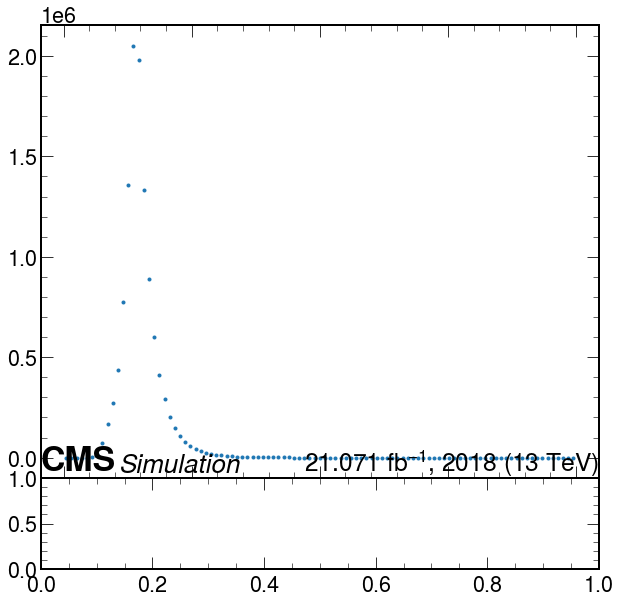

In [107]:
# PT data and MC ratio plots
# MC has more than data events --> doesn't match with the intution

fig = plt.figure(figsize=(10, 5))
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [10, 2]})
plt.subplots_adjust(wspace=0, hspace=0)
hep.style.use("CMS")
hep.cms.label(loc=0, lumi=21.071, year=2018)


ax1.errorbar(x=data_pt_centre, y=data_pt_stacked, yerr=np.sqrt(data_pt_stacked), fmt='.', capsize=1, label='data')
ax1.errorbar(x=mc_pt_centre,   y=mc_pt_stacked,   yerr=np.sqrt(mc_pt_stacked),   fmt='.', capsize=1, label='MC')
ax1.axhline(y=15)
ax1.legend()
ax1.grid('True')
ax1.set_title('Data prehem & MC $P_{T,2LJ}$')
ax1.set_yscale('log')

ratio = np.divide(data_pt_stacked,
                  mc_pt_stacked,
                  where=(mc_pt_stacked != 0))
                  
rotio = ratio[(mc_pt_stacked!=0) & (data_pt_stacked>15)]
edges = data_edges_pt[:len(data_edges_pt)-1][(mc_pt_stacked!=0) & (data_pt_stacked>15)]

ax2.plot(edges,rotio,'.')
ax2.grid('True')
ax2.set_xlabel('$P_{T,2LJ}$ (GeV)')
ax2.set_ylabel('Data/MC')

In [12]:


# MET plots #
# Computing k-factor


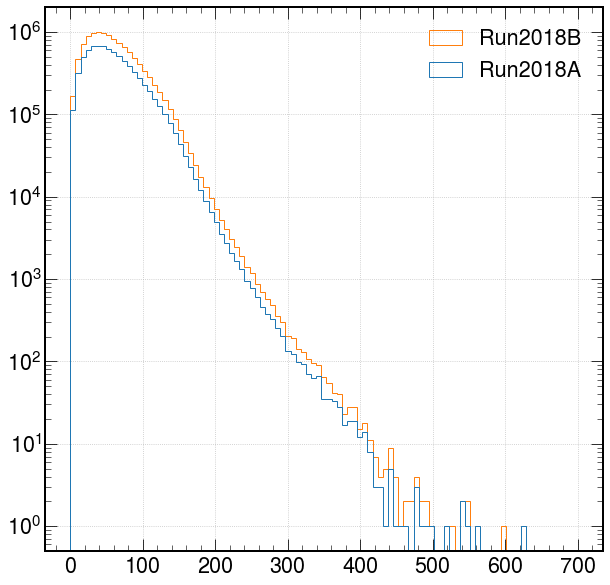

In [103]:
qcd_met_values =   [qcd_bin[n]['met'] for n in range(0,9)]
ttjet_met_values = [ttjet_bin[n]['met'] for n in range(0,8)]
wjet_met_values =  [wjet_bin[n]['met'] for n in range(0,5)]
zjet_met_values =  [zjet_bin[n]['met'] for n in range(0,5)]

mc_met_values = [qcd_met_values, ttjet_met_values, wjet_met_values, zjet_met_values]
data_met_values =   [data_prehem[n]['met'] for n in range(0,2)]
met_bins = np.linspace(0, 700, 100)

val_data_met, data_edges_met, patches_data_met = plt.hist(data_met_values, met_bins, stacked=True, histtype='step', label=data_labels)
#plt.close()
plt.yscale('log')
plt.grid()
plt.legend()

data_met_centre = (data_edges_met[1:]+data_edges_met[:-1])/2
data_met_stacked = val_data_met[1]

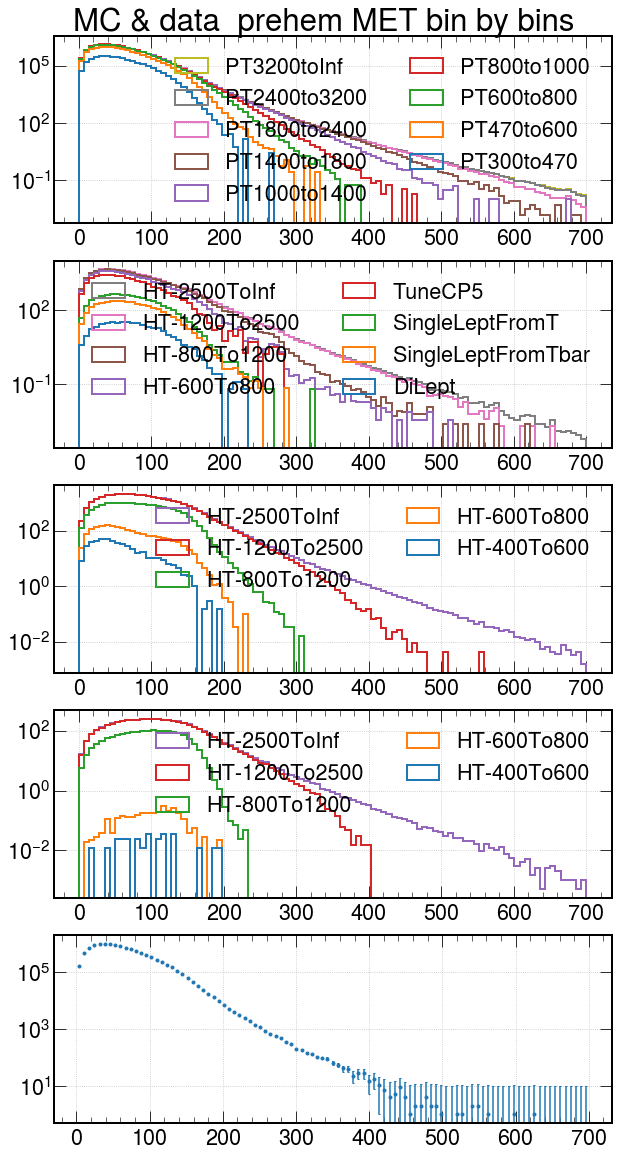

In [104]:
fig, ax = plt.subplots(5, 1, figsize=(10,20))
fig.suptitle('MC & data_prehem MET bin by bins', y=0.9)
#met_bins = np.linspace(0, 700, 100)

for i in range(0,4):
    ax[i].hist(mc_met_values[i], met_bins, stacked=True, histtype = 'step', label = mc_labels[i], weights = mc_weights_arr[i], linewidth=2)
    ax[i].set_yscale('log')
    ax[i].grid(True)
    ax[i].legend(ncol=2)

ax[4].errorbar(x=data_met_centre, y=data_met_stacked, yerr=np.sqrt(data_met_stacked.size), fmt='.', capsize=1, label='data')
ax[4].set_yscale('log')
ax[4].grid(True)
ax[4].set_label('MET (GeV)')

fig.savefig('png/MC_met.png')

1369828.6276161498


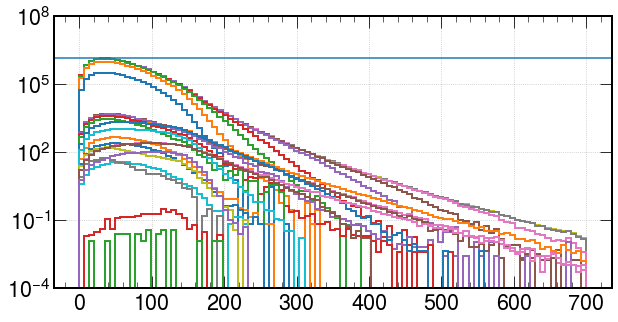

In [105]:
fig = plt.figure(figsize=(10, 5))
mc_val_met = {}
mc_edges_met = {}
mc_patches_met = {}

for i in range(0,4):
    mc_val_met[i], mc_edges_met[i], mc_patches_met[i] = plt.hist(mc_met_values[i], met_bins, stacked=True, histtype = 'step', label = mc_labels[i], weights = mc_weights_arr[i], linewidth=2)
plt.yscale('log')
plt.grid()
#plt.close()
plt.ylim(0.0001,100000000)


mc_met_centre = (mc_edges_met[0][1:]+mc_edges_met[0][:-1])/2
mc_met_stacked = mc_val_met[0][len(mc_val_met[0])-1] + mc_val_met[1][len(mc_val_met[1])-1] + mc_val_met[2][len(mc_val_met[2])-1]+mc_val_met[3][len(mc_val_met[3])-1]

plt.axhline(y=max(mc_met_stacked))
print(max(mc_met_stacked))

<Figure size 720x360 with 0 Axes>

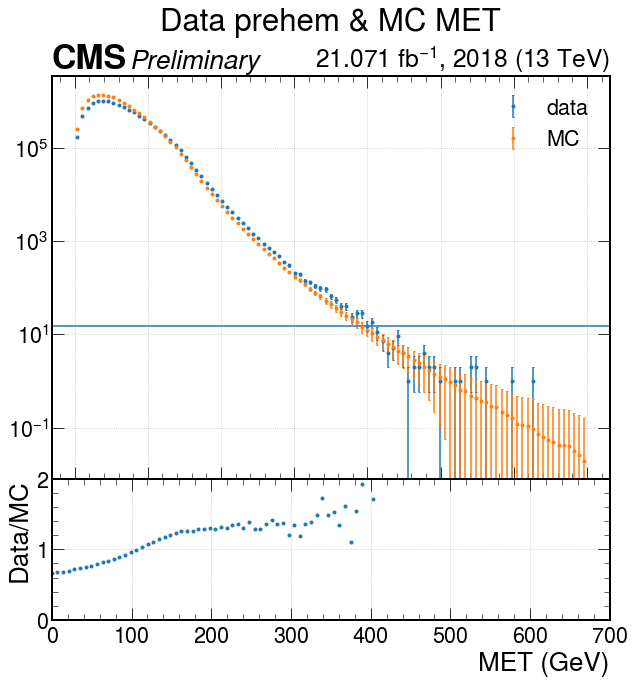

In [125]:
fig = plt.figure(figsize=(10, 5))
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [20, 7]})
plt.subplots_adjust(wspace=0, hspace=0)
hep.style.use("CMS")
hep.cms.label('Preliminary', data=True, loc=0, lumi=21.071, year=2018, ax=ax1)


ax1.errorbar(x=data_met_centre, y=data_met_stacked, yerr=np.sqrt(data_met_stacked), fmt='.', capsize=1, label='data')
ax1.errorbar(x=mc_met_centre,   y=mc_met_stacked,   yerr=np.sqrt(mc_met_stacked),   fmt='.', capsize=1, label='MC')
ax1.axhline(y=15)
ax1.legend()
ax1.grid('True')
ax1.set_title('Data prehem & MC MET',y=1.1)
ax1.set_yscale('log')
#ax1.set_ylim(100000, 1000000)

ratio = np.divide(data_met_stacked,
                  mc_met_stacked,
                  where=(mc_met_stacked != 0))
                  
rotio = ratio[(mc_met_stacked!=0) & (data_met_stacked>15)]
edges = data_edges_met[:len(data_edges_met)-1][(mc_met_stacked!=0) & (data_met_stacked>15)]

ax2.plot(edges,rotio,'.')
ax2.set_ylim(0,2)
ax2.grid('True')
ax2.set_xlabel('MET (GeV)')
ax2.set_ylabel('Data/MC')
ax2.set_xlim(0,700)
#ax2.set_ylim(0,1)
fig.savefig('png/MC_metRatioPlot.png')

In [17]:
QCD    = mc_val_met[0][8]
TTJets = mc_val_met[1][7]
WJets  = mc_val_met[2][4]
ZJets  = mc_val_met[3][4]

D_bar = np.zeros(500)

for i in range(0,500):
    r = np.divide(data_met_stacked,
        QCD * (0.01*i) + TTJets + WJets + ZJets,
        where=((QCD + TTJets + WJets + ZJets) != 0))
    MC = QCD * (0.1*i) + TTJets + WJets + ZJets
    
    '''if i!=1: continue
    plt.errorbar(x=data_met_centre, y=data_met_stacked, yerr=np.sqrt(data_met_stacked), fmt='.', capsize=1, label='data')
    plt.errorbar(x=mc_met_centre,   y=MC,   yerr=np.sqrt(MC),   fmt='.', capsize=1, label='MC')
    plt.legend()
    plt.yscale('log')'''

    rat = r[data_met_stacked > 15]
    r_bar = np.mean(rat)
    D_bar[i] = np.mean(pow((rat-r_bar),2))

                  
print(min(D_bar))
i = np.arange(0,5, 0.01)
print(np.where(D_bar==min(D_bar)))
k_factor = i[np.where(D_bar==min(D_bar))]
print(k_factor)

0.005146445520642911
(array([499]),)
[4.99]


Text(0, 0.5, 'd_bar')

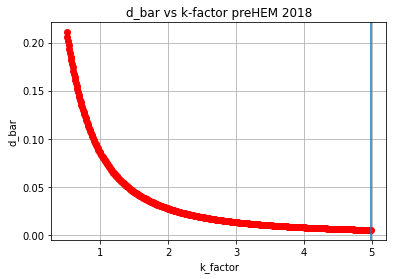

In [18]:
plt.plot(i[50:], D_bar[50:], 'ro')
plt.axvline(x=k_factor)
plt.grid('True')
plt.title("d_bar vs k-factor preHEM 2018")
plt.xlabel("k_factor")
plt.ylabel("d_bar")

In [109]:
qcd_weights_arr_kapplied   = [np.ones_like(qcd_bin[n]['pt'])*qcd_weight[n]*k_factor for n in range(0,9)]
mc_weights_arr_kapplied = [qcd_weights_arr_kapplied, ttjet_weights_arr, wjet_weights_arr, zjet_weights_arr]


for i in range(0,4):
    mc_val_met[i], mc_edges_met[i], mc_patches_met[i] = plt.hist(mc_met_values[i], met_bins, stacked=True, histtype = 'step', label = mc_labels[i], weights = mc_weights_arr_kapplied[i], linewidth=2)
plt.close()

mc_met_centre = (mc_edges_met[0][1:]+mc_edges_met[0][:-1])/2
mc_met_stacked = mc_val_met[0][len(mc_val_met[0])-1]*k_factor + mc_val_met[1][len(mc_val_met[1])-1] + mc_val_met[2][len(mc_val_met[2])-1]+mc_val_met[3][len(mc_val_met[3])-1]

fig = plt.figure(figsize=(10, 100))
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5, 1]})
plt.subplots_adjust(wspace=0, hspace=0)
hep.style.use("CMS")
hep.cms.label(loc=0, lumi=21.071, year=2018)
ratio = np.divide(data_met_stacked,
                  mc_met_stacked,
                  where=(mc_met_stacked != 0))
                
rotio = ratio[(mc_met_stacked !=0) & (data_met_stacked>15)]


ax1.errorbar(x=data_met_centre, y=data_met_stacked, yerr=np.sqrt(data_met_stacked), fmt='.', capsize=1, label='data')
ax1.errorbar(x=mc_met_centre, y=mc_met_stacked, yerr=np.sqrt(mc_met_stacked), fmt='.', capsize=1, label='MC')
ax1.legend()
ax1.grid('True')
ax1.set_title('Data prehem & MC MET: k_factor applied')
ax1.axhline(y=15)
ax1.set_yscale('log')
#ax1.set_xlim(0,200)

edges = data_edges_met[:len(data_edges_met)-1][(mc_met_stacked!=0) & (data_met_stacked>15)]

ax2.plot(edges,rotio,'.')
ax2.grid('True')
ax2.set_xlabel('MET (GeV)')
ax2.set_ylabel('Data/MC')
ax2.set_xlim(0,700)


NameError: name 'k_factor' is not defined

In [20]:
'''QCD    = mc_val_met[0][8]
TTJets = mc_val_met[1][7]
WJets  = mc_val_met[2][4]
ZJets  = mc_val_met[3][4]'''
integral_qcd = 0
integral_ttjet = 0
integral_wjet = 0
integral_zjet = 0

for i in range(0,99):
    integral_qcd += QCD[i]*mc_met_centre[i]
    integral_ttjet += TTJets[i]*mc_met_centre[i]
    integral_wjet += WJets[i]*mc_met_centre[i]
    integral_zjet += ZJets[i]*mc_met_centre[i]
    
print(integral_qcd, integral_ttjet, integral_wjet, integral_zjet)
print(integral_qcd/integral_ttjet)
print(integral_qcd/integral_wjet)
print(integral_qcd/integral_zjet)



784323801.2268214 4213247.912871162 3193329.4899754054 506705.7035646071
186.1565750334249
245.61317699566987
1547.8882430357662


In [21]:
568041.9271949716 * 3.5353535353535355
integral_qcd

784323801.2268214

In [22]:
data_prehem_runA_nortxcut = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/Data_04142022_Run2018A_UL_nortxcuts_Run2018A-UL2018-v1/JetHT/*.npz'))
data_prehem_runB_nortxcut = H.combine_npzs(glob.glob('/home/snabili/hadoop/UltraLegacy_npz/Data_04142022_nortxcuts_Run2018B-UL2018-v1/JetHT/*.npz'))

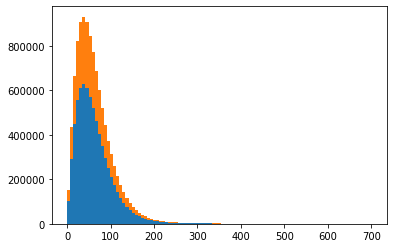

In [23]:
data_prehem_met_nortxcut = [data_prehem_runA_nortxcut['met'], data_prehem_runB_nortxcut['met']]
data_met_val_nortxcut, data_met_edges_nortxcut, data_met_patch_nortxcut = plt.hist(data_prehem_met_nortxcut, met_bins, stacked=True)

Text(0.5, 1.0, 'data MET comparison: no RTx cut, RTx < 1.15')

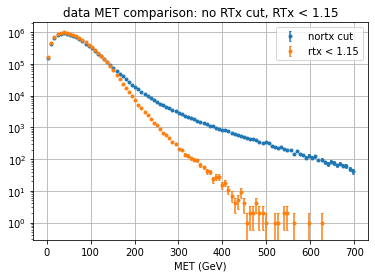

In [24]:
data_met_centre_nortxcut = (data_met_edges_nortxcut[1:]+data_met_edges_nortxcut[:-1])/2

plt.errorbar(x=data_met_centre_nortxcut, y=data_met_val_nortxcut[1], yerr=np.sqrt(data_met_val_nortxcut[1]), fmt='.', capsize=1, label='nortx cut')
plt.errorbar(x=data_met_centre, y=data_met_stacked, yerr=np.sqrt(data_met_stacked), fmt='.', capsize=1, label='rtx < 1.15')
plt.grid()
plt.yscale('log')
plt.legend()
plt.xlabel('MET (GeV)')
plt.title('data MET comparison: no RTx cut, RTx < 1.15')

In [25]:
# adding lepton veto into the preselection cuts

In [7]:
# this cell adds the lepton veto as n_electrons == 0 and n_muons==0 to $P{T_2LJ}$

qcd_pt_values_nlept = [qcd_bin[n]['pt'][(qcd_bin[n]['n_electrons']==0) & (qcd_bin[n]['n_muons']==0)] for n in range(0,9)]
ttjet_pt_values_nlept = [ttjet_bin[n]['pt'][(ttjet_bin[n]['n_electrons']==0) & (ttjet_bin[n]['n_muons']==0)] for n in range(0,8)]
wjet_pt_values_nlept =  [wjet_bin[n]['pt'][(wjet_bin[n]['n_electrons']==0) & (wjet_bin[n]['n_muons']==0)] for n in range(0,5)]
zjet_pt_values_nlept =  [zjet_bin[n]['pt'][(zjet_bin[n]['n_electrons']==0) & (zjet_bin[n]['n_muons']==0)] for n in range(0,5)]


qcd_sel_eff_nlept = (list(len(qcd_bin[n]['pt'][(qcd_bin[n]['n_electrons']==0) & (qcd_bin[n]['n_muons']==0)])/qcd_bin[n]['total'] for n in range(0,9)))
ttjet_sel_eff_nlept = (list(len(ttjet_bin[n]['pt'][(ttjet_bin[n]['n_electrons']==0) & (ttjet_bin[n]['n_muons']==0)])/ttjet_bin[n]['total'] for n in range(0,8)))
wjet_sel_eff_nlept = (list(len(wjet_bin[n]['pt'][(wjet_bin[n]['n_electrons']==0) & (wjet_bin[n]['n_muons']==0)])/wjet_bin[n]['total'] for n in range(0,5)))
zjet_sel_eff_nlept = (list(len(zjet_bin[n]['pt'][(zjet_bin[n]['n_electrons']==0) & (zjet_bin[n]['n_muons']==0)])/zjet_bin[n]['total'] for n in range(0,5)))

#  6-Compute weight
qcd_weight_nlept   = qcd_crossections   *qcd_sel_eff_nlept   * prehem_lumi / qcd_pass
ttjet_weight_nlept = ttjet_crossections *ttjet_sel_eff_nlept * prehem_lumi / ttjet_pass
wjet_weight_nlept  = wjet_crossections  *wjet_sel_eff_nlept  * prehem_lumi / wjet_pass
zjet_weight_nlept  = zjet_crossections  *zjet_sel_eff_nlept  * prehem_lumi / zjet_pass


qcd_weights_arr_nlept   = [np.ones_like(qcd_bin[n]['pt'][(qcd_bin[n]['n_electrons']==0) & (qcd_bin[n]['n_muons']==0)])*qcd_weight_nlept[n] for n in range(0,9)]
ttjet_weights_arr_nlept = [np.ones_like(ttjet_bin[n]['pt'][(ttjet_bin[n]['n_electrons']==0) & (ttjet_bin[n]['n_muons']==0)])*ttjet_weight_nlept[n] for n in range(0,8)]
wjet_weights_arr_nlept  = [np.ones_like(wjet_bin[n]['pt'][(wjet_bin[n]['n_electrons']==0) & (wjet_bin[n]['n_muons']==0)])*wjet_weight_nlept[n] for n in range(0,5)]
zjet_weights_arr_nlept  = [np.ones_like(zjet_bin[n]['pt'][(zjet_bin[n]['n_electrons']==0) & (zjet_bin[n]['n_muons']==0)])*zjet_weight_nlept[n] for n in range(0,5)]



mc_pt_values_nlept = [qcd_pt_values_nlept, ttjet_pt_values_nlept, wjet_pt_values_nlept, zjet_pt_values_nlept]
mc_labels = [qcd_label, ttjet_label, wjet_label, zjet_label]
mc_weights_arr_nlept = [qcd_weights_arr_nlept, ttjet_weights_arr_nlept, wjet_weights_arr_nlept, zjet_weights_arr_nlept]


data_pt_values_nlept =   [data_prehem[n]['pt'][(data_prehem[n]['n_electrons']==0) & (data_prehem[n]['n_muons']==0)] for n in range(0,2)]



In [8]:
print('previous MC eff vs n_lepton == 0 eff:')
print('     QCD before:    ', ["{:.2e}".format(qcd_sel_eff[n]) for n in range(0,9)])
print('     QCD after :    ', ["{:.2e}".format(qcd_sel_eff_nlept[n]) for n in range(0,9)])
print('*'*50)
print('     TTJets before: ', ["{:.2e}".format(ttjet_sel_eff[n]) for n in range(0,8)])
print('     TTJets after : ', ["{:.2e}".format(ttjet_sel_eff_nlept[n]) for n in range(0,8)])
print('*'*50)
print('     WJets before:  ', ["{:.2e}".format(wjet_sel_eff[n]) for n in range(0,4)])
print('     WJets after :  ', ["{:.2e}".format(wjet_sel_eff_nlept[n]) for n in range(0,4)])
print('*'*50)
print('     ZJets before:  ', ["{:.2e}".format(zjet_sel_eff[n]) for n in range(0,4)])
print('     ZJets after :  ', ["{:.2e}".format(zjet_sel_eff_nlept[n]) for n in range(0,4)])

previous MC eff vs n_lepton == 0 eff:
     QCD before:     ['1.92e-02', '4.94e-01', '9.06e-01', '9.16e-01', '9.00e-01', '8.71e-01', '8.43e-01', '8.08e-01', '7.79e-01']
     QCD after :     ['1.77e-02', '4.58e-01', '8.33e-01', '8.31e-01', '8.06e-01', '7.63e-01', '7.22e-01', '6.74e-01', '6.31e-01']
**************************************************
     TTJets before:  ['2.39e-04', '6.78e-04', '6.73e-04', '1.49e-03', '2.59e-01', '5.05e-01', '7.69e-01', '8.49e-01']
     TTJets after :  ['1.93e-05', '1.11e-04', '1.09e-04', '1.05e-03', '1.31e-01', '2.44e-01', '3.53e-01', '3.59e-01']
**************************************************
     WJets before:   ['4.44e-04', '5.36e-03', '1.28e-01', '6.81e-01']
     WJets after :   ['4.66e-05', '6.63e-04', '4.06e-02', '2.47e-01']
**************************************************
     ZJets before:   ['1.26e-06', '4.51e-05', '6.37e-02', '5.08e-01']
     ZJets after :   ['1.26e-06', '4.07e-05', '5.98e-02', '4.67e-01']


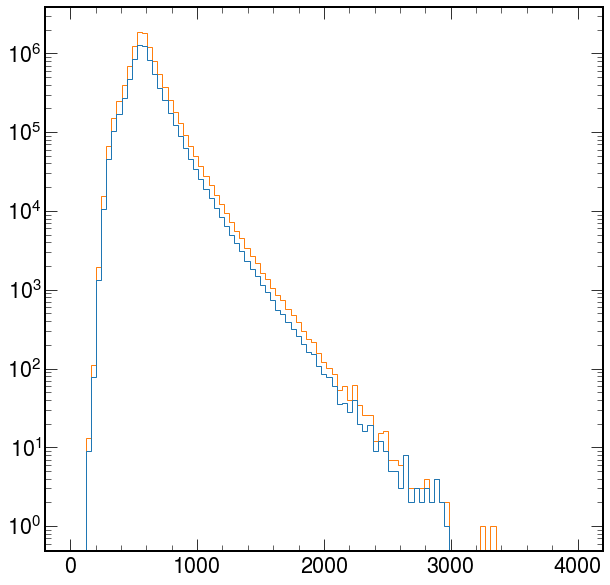

In [111]:
pt_bins = np.linspace(0, 4000, 100)
val_data_pt_nlept, data_edges_pt_nlept, patches_data_pt_nlept = plt.hist(data_pt_values_nlept, pt_bins, stacked=True, histtype='step', label=data_labels)
#plt.close()
plt.yscale('log')
data_pt_centre_nlept = (data_edges_pt_nlept[1:]+data_edges_pt_nlept[:-1])/2
data_pt_stacked_nlept = val_data_pt_nlept[1]

2187458.429504745


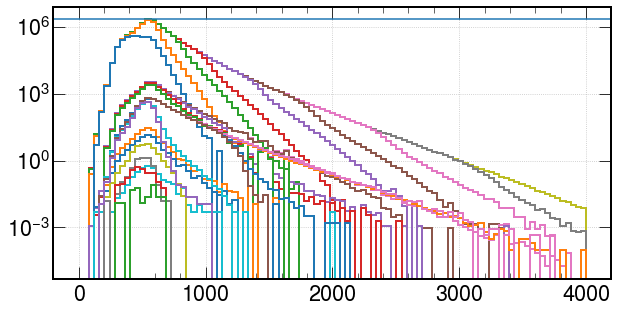

In [113]:
fig = plt.figure(figsize=(10, 5))
mc_val_pt_nlept = {}
mc_edges_pt_nlept = {}
mc_patches_pt_nlept = {}

for i in range(0,4):
    mc_val_pt_nlept[i], mc_edges_pt_nlept[i], mc_patches_pt_nlept[i] = plt.hist(mc_pt_values_nlept[i], pt_bins, stacked=True, histtype = 'step', label = mc_labels[i], weights = mc_weights_arr_nlept[i], linewidth=2)
plt.yscale('log')
plt.grid()
#plt.close()
#plt.ylim(0.0001,100000000)


mc_pt_centre_nlept = (mc_edges_pt_nlept[0][1:]+mc_edges_pt_nlept[0][:-1])/2
mc_pt_stacked_nlept = mc_val_pt_nlept[0][len(mc_val_pt_nlept[0])-1] + mc_val_pt_nlept[1][len(mc_val_pt_nlept[1])-1] + mc_val_pt_nlept[2][len(mc_val_pt_nlept[2])-1]+mc_val_pt_nlept[3][len(mc_val_pt_nlept[3])-1]

plt.axhline(y=max(mc_pt_stacked_nlept))
print(max(mc_pt_stacked_nlept))

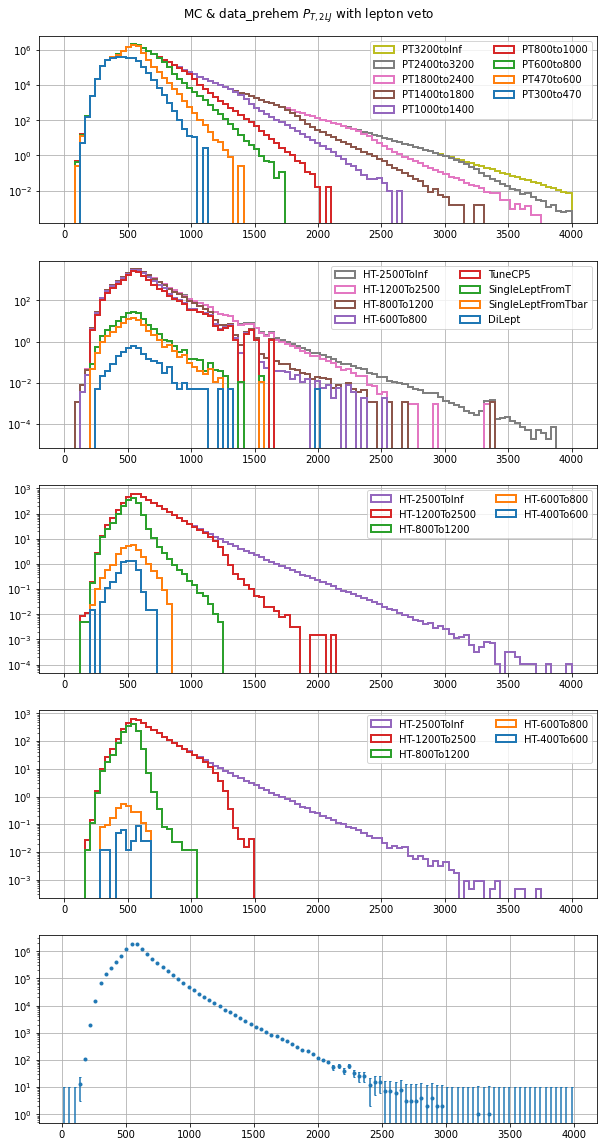

In [31]:
fig, ax = plt.subplots(5, 1, figsize=(10,20))
fig.suptitle('MC & data_prehem $P_{T,2LJ}$ with lepton veto', y=0.9)


for i in range(0,4):
    ax[i].hist(mc_pt_values_nlept[i], pt_bins, stacked=True, histtype = 'step', label = mc_labels[i], weights = mc_weights_arr_nlept[i], linewidth=2)
    ax[i].set_yscale('log')
    ax[i].grid(True)
    ax[i].legend(ncol=2)

ax[4].errorbar(x=data_pt_centre_nlept, y=data_pt_stacked_nlept, yerr=np.sqrt(data_pt_stacked_nlept.size), fmt='.', capsize=1, label='data')
ax[4].set_yscale('log')
ax[4].grid(True)
ax[4].set_label('pt (GeV)')

fig.savefig('png/MC_pt_nlept.png')

<Figure size 720x360 with 0 Axes>

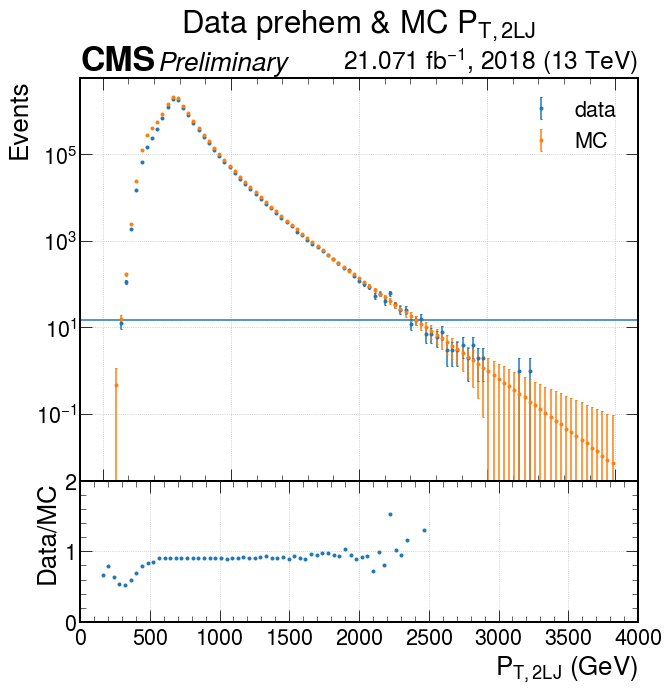

In [126]:
fig = plt.figure(figsize=(10, 5))
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [20, 7]})
plt.subplots_adjust(wspace=0, hspace=0)
hep.cms.label('Preliminary', data=True, loc=0, lumi=21.071, year=2018, ax=ax1)
hep.style.use("CMS")


ax1.errorbar(x=data_pt_centre_nlept, y=data_pt_stacked_nlept, yerr=np.sqrt(data_pt_stacked_nlept), fmt='.', capsize=1, label='data')
ax1.errorbar(x=mc_pt_centre_nlept,   y=mc_pt_stacked_nlept,   yerr=np.sqrt(mc_pt_stacked_nlept),   fmt='.', capsize=1, label='MC')
ax1.axhline(y=15)
ax1.legend()
ax1.grid('True')
ax1.set_title('Data prehem & MC $P_{T,2LJ}$',y=1.1)
ax1.set_yscale('log')
ax1.set_ylabel('Events')
#ax1.set_ylim(100000, 1000000)

ratio_nlept = np.divide(data_pt_stacked_nlept,
                  mc_pt_stacked_nlept,
                  where=(mc_pt_stacked_nlept != 0))
                  
rotio_nlept = ratio_nlept[(mc_pt_stacked_nlept!=0) & (data_pt_stacked_nlept>15)]
edges_nlept = data_edges_pt_nlept[:len(data_edges_pt_nlept)-1][(mc_pt_stacked_nlept!=0) & (data_pt_stacked_nlept>15)]

'''yer_nlept = np.divide(np.sqrt(data_pt_stacked_nlept),
                    np.sqrt(mc_pt_stacked_nlept),
                    where=(np.sqrt(mc_pt_stacked_nlept)!=0))
yerr_nlept = yer_nlept[(mc_pt_stacked_nlept!=0) & (data_pt_stacked_nlept>15)]'''
ax2.plot(edges_nlept,rotio_nlept,'.')
#ax2.errorbar(x=edges_nlept, y=rotio_nlept, yerr=yerr_nlept, fmt='.', capsize=1)
ax2.set_ylim(0,2)
ax2.grid('True')
ax2.set_xlabel('$P_{T,2LJ}$ (GeV)')
ax2.set_ylabel('Data/MC')
ax2.set_xlim(0,4000)
#ax2.set_ylim(0,1)
fig.savefig('png/MC_ptRatioPlot_nlept.png')

In [33]:
# MET ratio plots with lepton veto

In [97]:
# this cell adds the lemeton veto as n_electrons == 0 and n_muons==0 to $P{T_2LJ}$

qcd_met_values_nlept = [qcd_bin[n]['met'][(qcd_bin[n]['n_electrons']==0) & (qcd_bin[n]['n_muons']==0)] for n in range(0,9)]
ttjet_met_values_nlept = [ttjet_bin[n]['met'][(ttjet_bin[n]['n_electrons']==0) & (ttjet_bin[n]['n_muons']==0)] for n in range(0,8)]
wjet_met_values_nlept =  [wjet_bin[n]['met'][(wjet_bin[n]['n_electrons']==0) & (wjet_bin[n]['n_muons']==0)] for n in range(0,5)]
zjet_met_values_nlept =  [zjet_bin[n]['met'][(zjet_bin[n]['n_electrons']==0) & (zjet_bin[n]['n_muons']==0)] for n in range(0,5)]


mc_met_values_nlept = [qcd_met_values_nlept, ttjet_met_values_nlept, wjet_met_values_nlept, zjet_met_values_nlept]


data_met_values_nlept =   [data_prehem[n]['met'][(data_prehem[n]['n_electrons']==0) & (data_prehem[n]['n_muons']==0)] for n in range(0,2)]



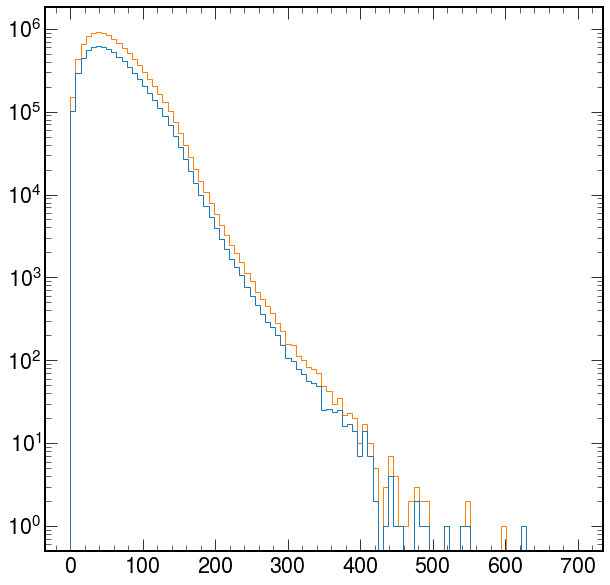

In [128]:
met_bins = np.linspace(0, 700, 100)
val_data_met_nlept, data_edges_met_nlept, patches_data_met_nlept = plt.hist(data_met_values_nlept, met_bins, stacked=True, histtype='step', label=data_labels)
#plt.close()
plt.yscale('log')
data_met_centre_nlept = (data_edges_met_nlept[1:]+data_edges_met_nlept[:-1])/2
data_met_stacked_nlept = val_data_met_nlept[1]

1173074.8784989996


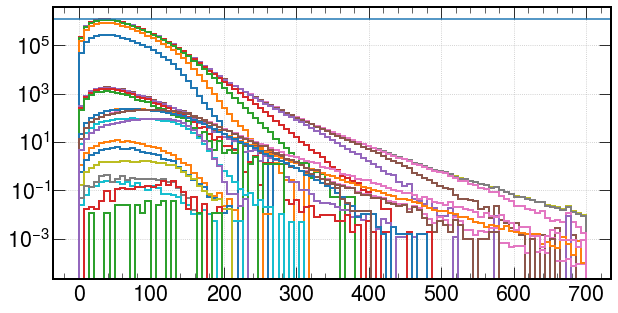

In [130]:
fig = plt.figure(figsize=(10, 5))
mc_val_met_nlept = {}
mc_edges_met_nlept = {}
mc_patches_met_nlept = {}

for i in range(0,4):
    mc_val_met_nlept[i], mc_edges_met_nlept[i], mc_patches_met_nlept[i] = plt.hist(mc_met_values_nlept[i], met_bins, stacked=True, histtype = 'step', label = mc_labels[i], weights = mc_weights_arr_nlept[i], linewidth=2)
plt.yscale('log')
plt.grid()
#plt.close()
#plt.ylim(0.0001,100000000)


mc_met_centre_nlept = (mc_edges_met_nlept[0][1:]+mc_edges_met_nlept[0][:-1])/2
mc_met_stacked_nlept = mc_val_met_nlept[0][len(mc_val_met_nlept[0])-1] + mc_val_met_nlept[1][len(mc_val_met_nlept[1])-1] + mc_val_met_nlept[2][len(mc_val_met_nlept[2])-1]+mc_val_met_nlept[3][len(mc_val_met_nlept[3])-1]

plt.axhline(y=max(mc_met_stacked_nlept))
print(max(mc_met_stacked_nlept))

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(10,20))
fig.suptitle('MC & data_prehem $P_{T,2LJ}$ with lepton veto', y=0.9)


for i in range(0,4):
    ax[i].hist(mc_met_values_nlept[i], met_bins, stacked=True, histtype = 'step', label = mc_labels[i], weights = mc_weights_arr_nlept[i], linewidth=2)
    ax[i].set_yscale('log')
    ax[i].grid(True)
    ax[i].legend(ncol=2)

ax[4].errorbar(x=data_met_centre_nlept, y=data_met_stacked_nlept, yerr=np.sqrt(data_met_stacked_nlept.size), fmt='.', capsize=1, label='data')
ax[4].set_yscale('log')
ax[4].grid(True)
ax[4].set_label('met (GeV)')

fig.savefig('png/MC_met_nlept.png')

<Figure size 720x360 with 0 Axes>

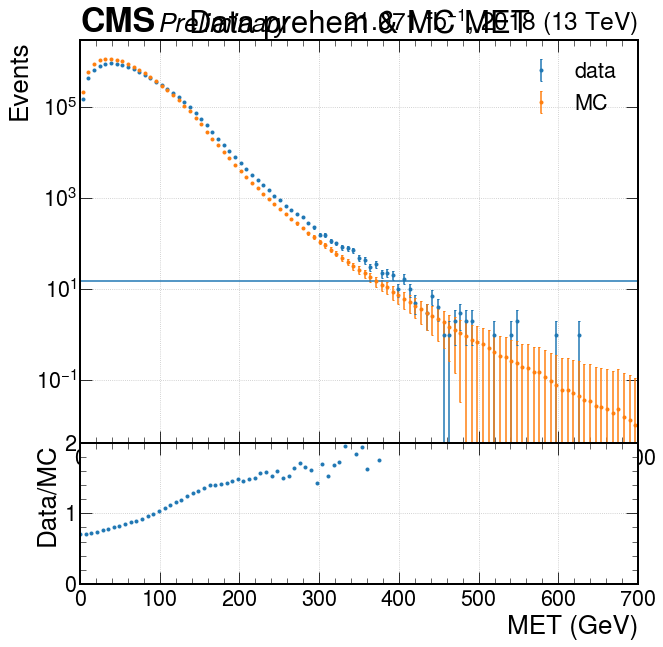

In [131]:
fig = plt.figure(figsize=(10, 5))
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [20, 7]})

plt.subplots_adjust(wspace=0, hspace=0)
hep.style.use("CMS")
hep.cms.label('Preliminary', data=True, loc=0, lumi=21.071, year=2018, ax=ax1)

ax1.errorbar(x=data_met_centre_nlept, y=data_met_stacked_nlept, yerr=np.sqrt(data_met_stacked_nlept), fmt='.', capsize=1, label='data')
ax1.errorbar(x=mc_met_centre_nlept,   y=mc_met_stacked_nlept,   yerr=np.sqrt(mc_met_stacked_nlept),   fmt='.', capsize=1, label='MC')
ax1.axhline(y=15)
ax1.legend()
ax1.grid('True')
ax1.set_title('Data prehem & MC MET')
ax1.set_yscale('log')
ax1.set_ylabel('Events')
ax1.set_xlim(0,700)
#ax1.set_ylim(100000, 1000000)

ratio_nlept = np.divide(data_met_stacked_nlept,
                  mc_met_stacked_nlept,
                  where=(mc_met_stacked_nlept != 0))
                  
rotio_nlept = ratio_nlept[(mc_met_stacked_nlept!=0) & (data_met_stacked_nlept>15)]
edges_nlept = data_edges_met_nlept[:len(data_edges_met_nlept)-1][(mc_met_stacked_nlept!=0) & (data_met_stacked_nlept>15)]

ax2.plot(edges_nlept,rotio_nlept,'.')
ax2.set_ylim(0,2)
ax2.grid('True')
ax2.set_xlabel('MET (GeV)')
ax2.set_ylabel('Data/MC')
ax2.set_xlim(0,700)
#ax2.set_ylim(0,1)
fig.savefig('png/MC_metRatioPlot_nlept.png')

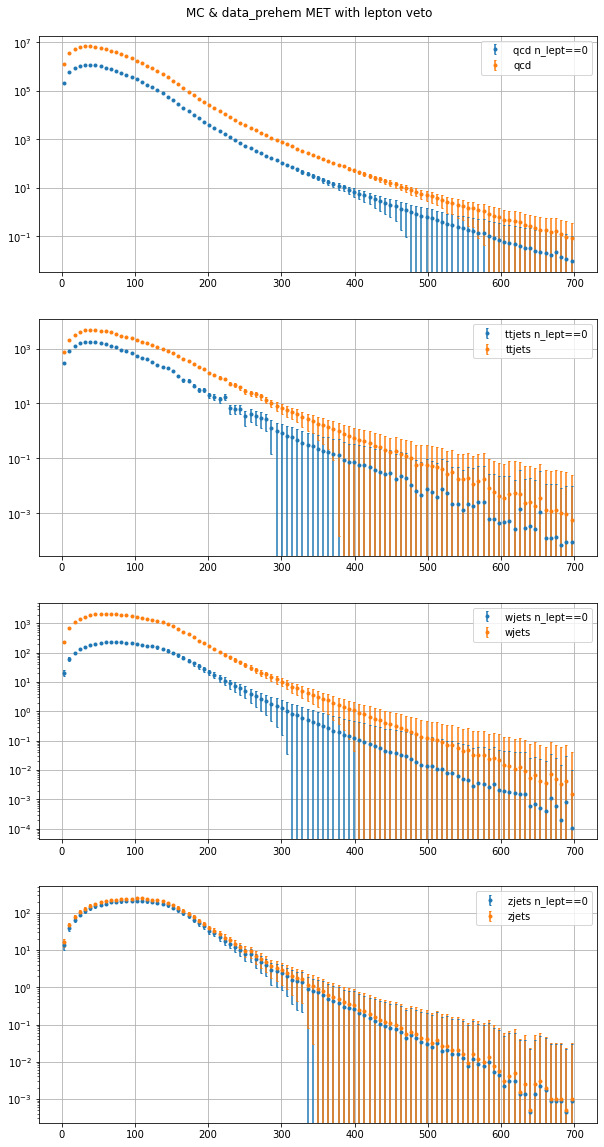

In [40]:

fig, ax = plt.subplots(4, 1, figsize=(10,20))
fig.suptitle('MC & data_prehem MET with lepton veto', y=0.9)
MC_labels = [['qcd','qcd n_lept==0'], ['ttjets', 'ttjets n_lept==0'], ['wjets', 'wjets n_lept==0'], ['zjets', 'zjets n_lept==0']]
for i in range(0,4):
    ax[i].errorbar(x=mc_met_centre_nlept, y=mc_val_met_nlept[i][len(mc_met_values_nlept[i])-1], yerr=np.sqrt(mc_val_met_nlept[i][len(mc_met_values_nlept[i])-1]),   fmt='.', capsize=1, label=MC_labels[i][1]) 
    ax[i].errorbar(x=mc_met_centre, y=mc_val_met[i][len(mc_met_values[i])-1], yerr=np.sqrt(mc_val_met[i][len(mc_met_values[i])-1]),   fmt='.', capsize=1, label=MC_labels[i][0]) 
    ax[i].set_yscale('log')
    ax[i].grid(True)
    ax[i].legend()


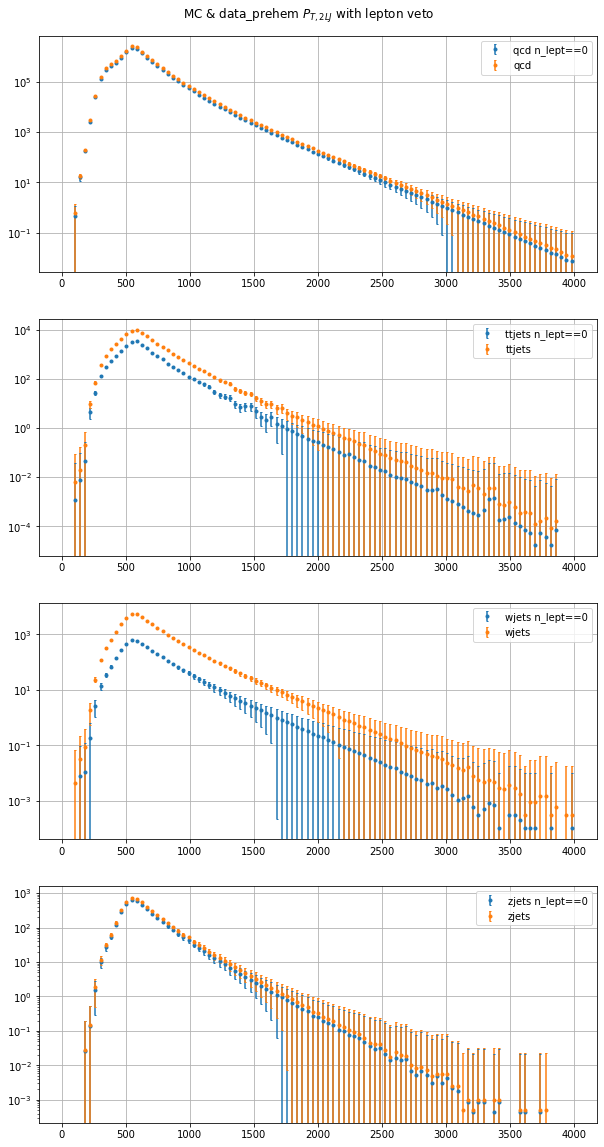

In [41]:
fig, ax = plt.subplots(4, 1, figsize=(10,20))
fig.suptitle('MC & data_prehem $P_{T,2LJ}$ with lepton veto', y=0.9)
MC_labels = [['qcd','qcd n_lept==0'], ['ttjets', 'ttjets n_lept==0'], ['wjets', 'wjets n_lept==0'], ['zjets', 'zjets n_lept==0']]
for i in range(0,4):
    ax[i].errorbar(x=mc_pt_centre_nlept, y=mc_val_pt_nlept[i][len(mc_pt_values_nlept[i])-1], yerr=np.sqrt(mc_val_pt_nlept[i][len(mc_pt_values_nlept[i])-1]),   fmt='.', capsize=1, label=MC_labels[i][1]) 
    ax[i].errorbar(x=mc_pt_centre, y=mc_val_pt[i][len(mc_pt_values[i])-1], yerr=np.sqrt(mc_val_pt[i][len(mc_pt_values[i])-1]),   fmt='.', capsize=1, label=MC_labels[i][0]) 
    ax[i].set_yscale('log')
    ax[i].grid(True)
    ax[i].legend()



In [40]:
qcd_l1pt_nlept   = [qcd_bin[n]['lj_pt'][(qcd_bin[n]['n_electrons']==0) & (qcd_bin[n]['n_muons']==0)] for n in range(0,9)]
ttjet_l1pt_nlept = [ttjet_bin[n]['lj_pt'][(ttjet_bin[n]['n_electrons']==0) & (ttjet_bin[n]['n_muons']==0)] for n in range(0,8)]
wjet_l1pt_nlept  = [wjet_bin[n]['lj_pt'][(wjet_bin[n]['n_electrons']==0) & (wjet_bin[n]['n_muons']==0)] for n in range(0,5)]
zjet_l1pt_nlept  = [zjet_bin[n]['lj_pt'][(zjet_bin[n]['n_electrons']==0) & (zjet_bin[n]['n_muons']==0)] for n in range(0,5)]

mc_l1pt_nlept = [qcd_l1pt_nlept, ttjet_l1pt_nlept, wjet_l1pt_nlept, zjet_l1pt_nlept ]

data_prehem_l1pt_nlept = [data_prehem[n]['lj_pt'][(data_prehem[n]['n_electrons']==0) & (data_prehem[n]['n_muons']==0)] for n in range(0,2)]

In [41]:
l1pt_bins = np.linspace(0, 4000, 100)

fig, ax = plt.subplots(5, 1, figsize=(10,20))
fig.suptitle('MC & data_prehem $P_{T,LJ}$ with lepton veto', y=0.9)
val_mc_l1pt_nlept = {}
edges_mc_l1pt_nlept = {}
patches_mc_l1pt_nlept = {}

for i in range(0,4):
    val_mc_l1pt_nlept[i], edges_mc_l1pt_nlept[i], patches_mc_l1pt_nlept[i] = ax[i].hist(mc_l1pt_nlept[i], l1pt_bins, stacked=True, histtype='step', weights=mc_weights_arr_nlept[i], linewidth=2) 
    ax[i].set_yscale('log')
    ax[i].grid(True) 
    
mc_l1pt_centre_nlept = (edges_mc_l1pt_nlept[1][1:]+edges_mc_l1pt_nlept[1][:-1])/2
mc_l1pt_stacked_nlept = val_mc_l1pt_nlept[0][8]+val_mc_l1pt_nlept[1][7]+val_mc_l1pt_nlept[2][4]+val_mc_l1pt_nlept[3][4]

val_data_l1pt_nlept = {}
edges_data_l1pt_nlept = {}
patches_data_l1pt_nlept = {}


val_data_l1pt_nlept, edges_data_l1pt_nlept, patches_data_l1pt_nlept = ax[4].hist([data_prehem_l1pt_nlept[j] for j in range(0,2)], l1pt_bins, stacked=True, histtype='step', linewidth=2)
ax[4].set_yscale('log')
ax[4].grid(True) 
plt.close('all')
data_l1pt_centre_nlept = (edges_data_l1pt_nlept[1:]+edges_data_l1pt_nlept[:-1])/2
data_l1pt_stacked_nlept = val_data_l1pt_nlept[1]





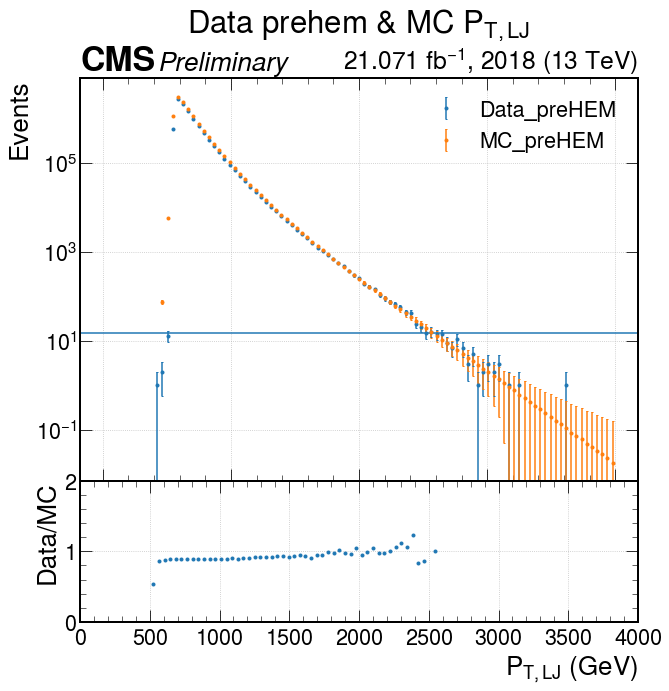

In [133]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [20, 7]})
plt.subplots_adjust(wspace=0, hspace=0)
hep.style.use("CMS")
hep.cms.label('Preliminary', data=True, loc=0, lumi=21.071, year=2018, ax= ax1)
ax1.errorbar(x=data_l1pt_centre_nlept, y=data_l1pt_stacked_nlept, yerr=np.sqrt(data_l1pt_stacked_nlept),   fmt='.', capsize=1, label='Data_preHEM') 
ax1.errorbar(x=mc_l1pt_centre_nlept, y=mc_l1pt_stacked_nlept, yerr=np.sqrt(mc_l1pt_stacked_nlept),   fmt='.', capsize=1, label='MC_preHEM') 
ax1.set_yscale('log')
ax1.set_ylabel('Events')
ax1.grid(True)
ax1.legend()
ax1.axhline(y=15)
ax1.set_title('Data prehem & MC $P_{T,LJ}$', y=1.1)


ratio_l1pt_nlept = np.divide(data_l1pt_stacked_nlept,
                  mc_l1pt_stacked_nlept,
                  where=(mc_l1pt_stacked_nlept != 0))
                  
rotio_l1pt_nlept = ratio_l1pt_nlept[(mc_l1pt_stacked_nlept!=0) & (data_l1pt_stacked_nlept>15)]
edges_l1pt_nlept = edges_data_l1pt_nlept[:len(edges_data_l1pt_nlept)-1][(mc_l1pt_stacked_nlept!=0) & (data_l1pt_stacked_nlept>15)]

ax2.plot(edges_l1pt_nlept,rotio_l1pt_nlept,'.')
ax2.set_ylim(0,2)
ax2.grid('True')
ax2.set_xlabel('$P_{T,LJ}$ (GeV)')
ax2.set_ylabel('Data/MC')
ax2.set_xlim(0,4000)

fig.savefig('png/MC_l1pt_RatioPlot_nlept.png')

In [ ]:
#energy

In [9]:
qcd_energy_nlept   = [qcd_bin[n]['energy'][(qcd_bin[n]['n_electrons']==0) & (qcd_bin[n]['n_muons']==0)] for n in range(0,9)]
ttjet_energy_nlept = [ttjet_bin[n]['energy'][(ttjet_bin[n]['n_electrons']==0) & (ttjet_bin[n]['n_muons']==0)] for n in range(0,8)]
wjet_energy_nlept  = [wjet_bin[n]['energy'][(wjet_bin[n]['n_electrons']==0) & (wjet_bin[n]['n_muons']==0)] for n in range(0,5)]
zjet_energy_nlept  = [zjet_bin[n]['energy'][(zjet_bin[n]['n_electrons']==0) & (zjet_bin[n]['n_muons']==0)] for n in range(0,5)]

mc_energy_nlept = [qcd_energy_nlept, ttjet_energy_nlept, wjet_energy_nlept, zjet_energy_nlept ]

data_prehem_energy_nlept = [data_prehem[n]['energy'][(data_prehem[n]['n_electrons']==0) & (data_prehem[n]['n_muons']==0)] for n in range(0,2)]

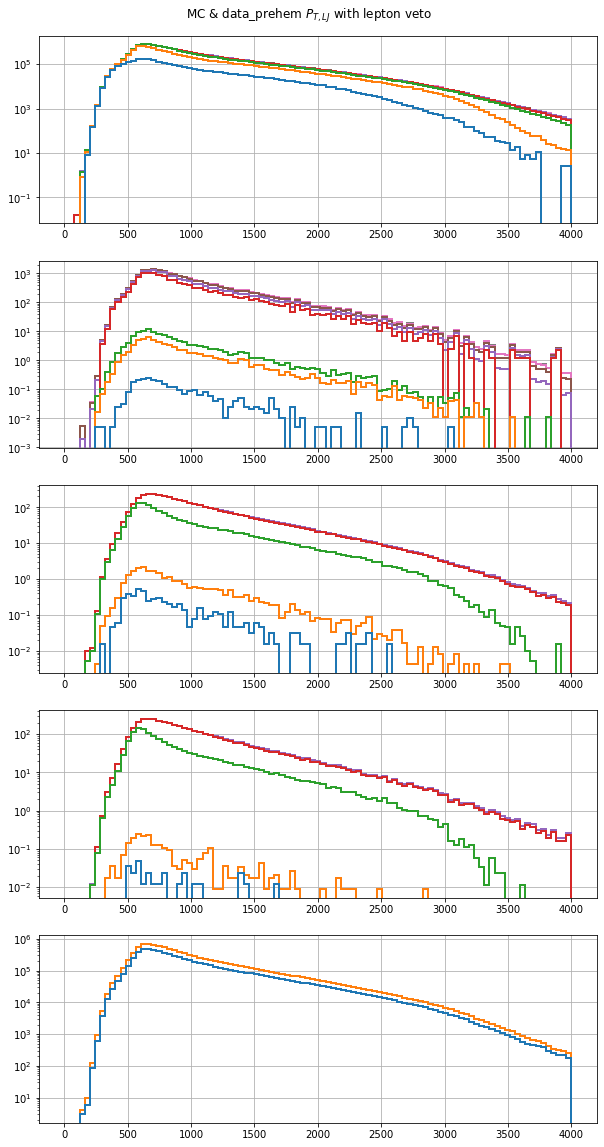

In [10]:
energy_bins = np.linspace(0, 4000, 100)

fig, ax = plt.subplots(5, 1, figsize=(10,20))
fig.suptitle('MC & data_prehem $P_{T,LJ}$ with lepton veto', y=0.9)
val_mc_energy_nlept = {}
edges_mc_energy_nlept = {}
patches_mc_energy_nlept = {}

for i in range(0,4):
    val_mc_energy_nlept[i], edges_mc_energy_nlept[i], patches_mc_energy_nlept[i] = ax[i].hist(mc_energy_nlept[i], energy_bins, stacked=True, histtype='step', weights=mc_weights_arr_nlept[i], linewidth=2) 
    ax[i].set_yscale('log')
    ax[i].grid(True) 
    
mc_energy_centre_nlept = (edges_mc_energy_nlept[1][1:]+edges_mc_energy_nlept[1][:-1])/2
mc_energy_stacked_nlept = val_mc_energy_nlept[0][8]+val_mc_energy_nlept[1][7]+val_mc_energy_nlept[2][4]+val_mc_energy_nlept[3][4]

val_data_energy_nlept = {}
edges_data_energy_nlept = {}
patches_data_energy_nlept = {}


val_data_energy_nlept, edges_data_energy_nlept, patches_data_energy_nlept = ax[4].hist([data_prehem_energy_nlept[j] for j in range(0,2)], energy_bins, stacked=True, histtype='step', linewidth=2)
ax[4].set_yscale('log')
ax[4].grid(True) 
plt.close('all')
data_energy_centre_nlept = (edges_data_energy_nlept[1:]+edges_data_energy_nlept[:-1])/2
data_energy_stacked_nlept = val_data_energy_nlept[1]



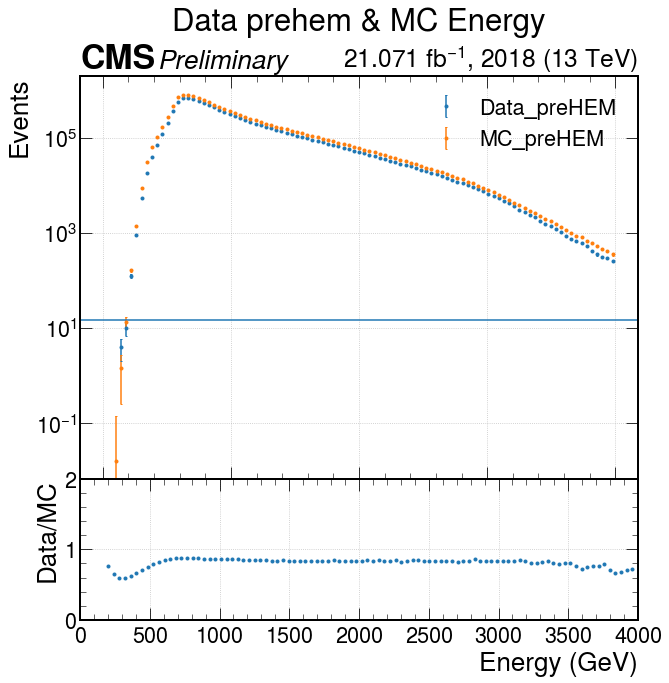

In [135]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [20, 7]})
plt.subplots_adjust(wspace=0, hspace=0)
hep.style.use("CMS")
hep.cms.label('Preliminary', data=True, loc=0, lumi=21.071, year=2018, ax=ax1)
ax1.errorbar(x=data_energy_centre_nlept, y=data_energy_stacked_nlept, yerr=np.sqrt(data_energy_stacked_nlept),   fmt='.', capsize=1, label='Data_preHEM') 
ax1.errorbar(x=mc_energy_centre_nlept, y=mc_energy_stacked_nlept, yerr=np.sqrt(mc_energy_stacked_nlept),   fmt='.', capsize=1, label='MC_preHEM') 
ax1.set_yscale('log')
ax1.set_ylabel('Events')
ax1.grid(True)
ax1.legend()
ax1.axhline(y=15)
ax1.set_title('Data prehem & MC Energy',y=1.1)


ratio_energy_nlept = np.divide(data_energy_stacked_nlept,
                  mc_energy_stacked_nlept,
                  where=(mc_energy_stacked_nlept != 0))
                  
rotio_energy_nlept = ratio_energy_nlept[(mc_energy_stacked_nlept!=0) & (data_energy_stacked_nlept>15)]
edges_energy_nlept = edges_data_energy_nlept[:len(edges_data_energy_nlept)-1][(mc_energy_stacked_nlept!=0) & (data_energy_stacked_nlept>15)]

ax2.plot(edges_energy_nlept,rotio_energy_nlept,'.')
ax2.set_ylim(0,2)
ax2.grid('True')
ax2.set_xlabel('Energy (GeV)')
ax2.set_ylabel('Data/MC')
ax2.set_xlim(0,4000)

fig.savefig('png/MC_energy_RatioPlot_nlept.png')

In [ ]:
# mass

In [12]:
qcd_mass_nlept   = [qcd_bin[n]['mass'][(qcd_bin[n]['n_electrons']==0) & (qcd_bin[n]['n_muons']==0)] for n in range(0,9)]
ttjet_mass_nlept = [ttjet_bin[n]['mass'][(ttjet_bin[n]['n_electrons']==0) & (ttjet_bin[n]['n_muons']==0)] for n in range(0,8)]
wjet_mass_nlept  = [wjet_bin[n]['mass'][(wjet_bin[n]['n_electrons']==0) & (wjet_bin[n]['n_muons']==0)] for n in range(0,5)]
zjet_mass_nlept  = [zjet_bin[n]['mass'][(zjet_bin[n]['n_electrons']==0) & (zjet_bin[n]['n_muons']==0)] for n in range(0,5)]

mc_mass_nlept = [qcd_mass_nlept, ttjet_mass_nlept, wjet_mass_nlept, zjet_mass_nlept ]

data_prehem_mass_nlept = [data_prehem[n]['mass'][(data_prehem[n]['n_electrons']==0) & (data_prehem[n]['n_muons']==0)] for n in range(0,2)]

In [43]:
mass_bins = np.linspace(0, 4000, 100)

fig, ax = plt.subplots(5, 1, figsize=(10,20))
fig.suptitle('MC & data_prehem $P_{T,LJ}$ with lepton veto', y=0.9)
val_mc_mass_nlept = {}
edges_mc_mass_nlept = {}
patches_mc_mass_nlept = {}

for i in range(0,4):
    val_mc_mass_nlept[i], edges_mc_mass_nlept[i], patches_mc_mass_nlept[i] = ax[i].hist(mc_mass_nlept[i], mass_bins, stacked=True, histtype='step', weights=mc_weights_arr_nlept[i], linewidth=2) 
    ax[i].set_yscale('log')
    ax[i].grid(True) 
    
mc_mass_centre_nlept = (edges_mc_mass_nlept[1][1:]+edges_mc_mass_nlept[1][:-1])/2
mc_mass_stacked_nlept = val_mc_mass_nlept[0][8]+val_mc_mass_nlept[1][7]+val_mc_mass_nlept[2][4]+val_mc_mass_nlept[3][4]

val_data_mass_nlept = {}
edges_data_mass_nlept = {}
patches_data_mass_nlept = {}


val_data_mass_nlept, edges_data_mass_nlept, patches_data_mass_nlept = ax[4].hist([data_prehem_mass_nlept[j] for j in range(0,2)], mass_bins, stacked=True, histtype='step', linewidth=2)
ax[4].set_yscale('log')
ax[4].grid(True) 
plt.close('all')
data_mass_centre_nlept = (edges_data_mass_nlept[1:]+edges_data_mass_nlept[:-1])/2
data_mass_stacked_nlept = val_data_mass_nlept[1]



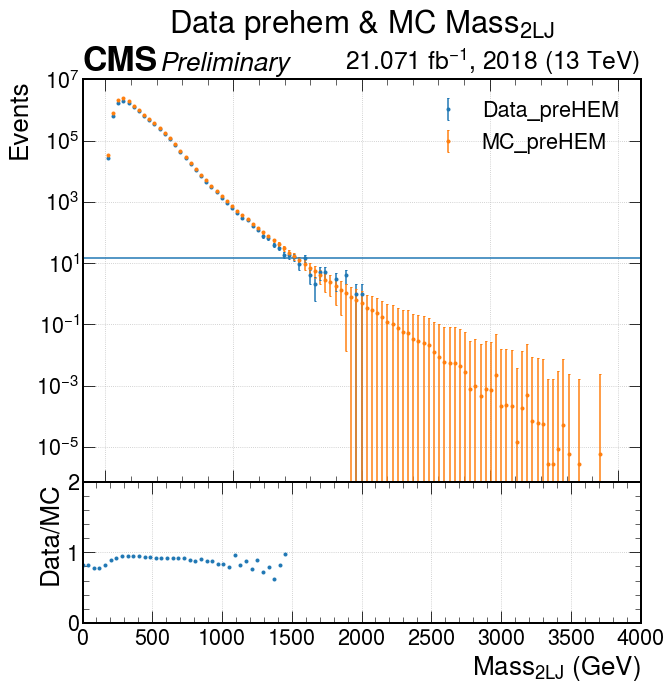

In [137]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [20, 7]})
plt.subplots_adjust(wspace=0, hspace=0)
hep.style.use("CMS")
hep.cms.label('Preliminary', data=True, loc=0, lumi=21.071, year=2018,ax=ax1)

ax1.errorbar(x=data_mass_centre_nlept, y=data_mass_stacked_nlept, yerr=np.sqrt(data_mass_stacked_nlept),   fmt='.', capsize=1, label='Data_preHEM') 
ax1.errorbar(x=mc_mass_centre_nlept, y=mc_mass_stacked_nlept, yerr=np.sqrt(mc_mass_stacked_nlept),   fmt='.', capsize=1, label='MC_preHEM') 
ax1.set_yscale('log')
ax1.set_ylabel('Events')
ax1.grid(True)
ax1.legend()
ax1.axhline(y=15)
ax1.set_title('Data prehem & MC $Mass_{2LJ}$', y=1.1)


ratio_mass_nlept = np.divide(data_mass_stacked_nlept,
                  mc_mass_stacked_nlept,
                  where=(mc_mass_stacked_nlept != 0))
                  
rotio_mass_nlept = ratio_mass_nlept[(mc_mass_stacked_nlept!=0) & (data_mass_stacked_nlept>15)]
edges_mass_nlept = edges_data_mass_nlept[:len(edges_data_mass_nlept)-1][(mc_mass_stacked_nlept!=0) & (data_mass_stacked_nlept>15)]

ax2.plot(edges_mass_nlept,rotio_mass_nlept,'.')
ax2.set_ylim(0,2)
ax2.grid('True')
ax2.set_xlabel('$Mass_{2LJ}$ (GeV)')
ax2.set_ylabel('Data/MC')
ax2.set_xlim(0,4000)

fig.savefig('png/MC_mass_RatioPlot_nlept.png')

In [ ]:
#mT

In [44]:
qcd_mt_nlept   = [qcd_bin[n]['mt'][(qcd_bin[n]['n_electrons']==0) & (qcd_bin[n]['n_muons']==0)] for n in range(0,9)]
ttjet_mt_nlept = [ttjet_bin[n]['mt'][(ttjet_bin[n]['n_electrons']==0) & (ttjet_bin[n]['n_muons']==0)] for n in range(0,8)]
wjet_mt_nlept  = [wjet_bin[n]['mt'][(wjet_bin[n]['n_electrons']==0) & (wjet_bin[n]['n_muons']==0)] for n in range(0,5)]
zjet_mt_nlept  = [zjet_bin[n]['mt'][(zjet_bin[n]['n_electrons']==0) & (zjet_bin[n]['n_muons']==0)] for n in range(0,5)]

mc_mt_nlept = [qcd_mt_nlept, ttjet_mt_nlept, wjet_mt_nlept, zjet_mt_nlept ]

data_prehem_mt_nlept = [data_prehem[n]['mt'][(data_prehem[n]['n_electrons']==0) & (data_prehem[n]['n_muons']==0)] for n in range(0,2)]

mt_bins = np.linspace(0, 4000, 100)

fig, ax = plt.subplots(5, 1, figsize=(10,20))
fig.suptitle('MC & data_prehem $P_{T,LJ}$ with lepton veto', y=0.9)
val_mc_mt_nlept = {}
edges_mc_mt_nlept = {}
patches_mc_mt_nlept = {}

for i in range(0,4):
    val_mc_mt_nlept[i], edges_mc_mt_nlept[i], patches_mc_mt_nlept[i] = ax[i].hist(mc_mt_nlept[i], mt_bins, stacked=True, histtype='step', weights=mc_weights_arr_nlept[i], linewidth=2) 
    ax[i].set_yscale('log')
    ax[i].grid(True) 
    
mc_mt_centre_nlept = (edges_mc_mt_nlept[1][1:]+edges_mc_mt_nlept[1][:-1])/2
mc_mt_stacked_nlept = val_mc_mt_nlept[0][8]+val_mc_mt_nlept[1][7]+val_mc_mt_nlept[2][4]+val_mc_mt_nlept[3][4]

val_data_mt_nlept = {}
edges_data_mt_nlept = {}
patches_data_mt_nlept = {}


val_data_mt_nlept, edges_data_mt_nlept, patches_data_mt_nlept = ax[4].hist([data_prehem_mt_nlept[j] for j in range(0,2)], mt_bins, stacked=True, histtype='step', linewidth=2)
ax[4].set_yscale('log')
ax[4].grid(True) 
plt.close('all')
data_mt_centre_nlept = (edges_data_mt_nlept[1:]+edges_data_mt_nlept[:-1])/2
data_mt_stacked_nlept = val_data_mt_nlept[1]




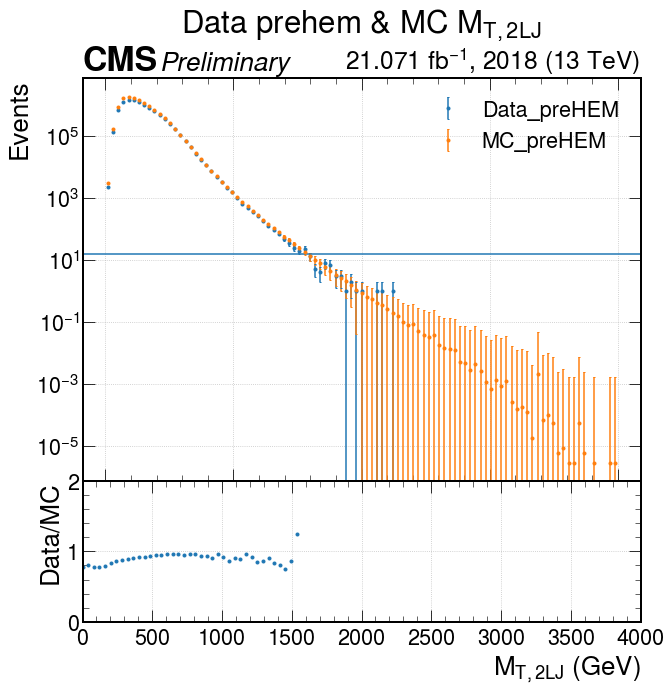

In [138]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [20, 7]})
plt.subplots_adjust(wspace=0, hspace=0)
hep.style.use("CMS")
hep.cms.label('Preliminary', data=True, loc=0, lumi=21.071, year=2018, ax=ax1)

ax1.errorbar(x=data_mt_centre_nlept, y=data_mt_stacked_nlept, yerr=np.sqrt(data_mt_stacked_nlept),   fmt='.', capsize=1, label='Data_preHEM') 
ax1.errorbar(x=mc_mt_centre_nlept, y=mc_mt_stacked_nlept, yerr=np.sqrt(mc_mt_stacked_nlept),   fmt='.', capsize=1, label='MC_preHEM') 
ax1.set_yscale('log')
ax1.set_ylabel('Events')
ax1.grid(True)
ax1.legend()
ax1.axhline(y=15)
ax1.set_title('Data prehem & MC $M_{T,2LJ}$', y=1.1)


ratio_mt_nlept = np.divide(data_mt_stacked_nlept,
                  mc_mt_stacked_nlept,
                  where=(mc_mt_stacked_nlept != 0))
                  
rotio_mt_nlept = ratio_mt_nlept[(mc_mt_stacked_nlept!=0) & (data_mt_stacked_nlept>15)]
edges_mt_nlept = edges_data_mt_nlept[:len(edges_data_mt_nlept)-1][(mc_mt_stacked_nlept!=0) & (data_mt_stacked_nlept>15)]

ax2.plot(edges_mt_nlept,rotio_mt_nlept,'.')
ax2.set_ylim(0,2)
ax2.grid('True')
ax2.set_xlabel('$M_{T,2LJ}$ (GeV)')
ax2.set_ylabel('Data/MC')
ax2.set_xlim(0,4000)

fig.savefig('png/MC_mt_RatioPlot_nlept.png')

In [ ]:
# eta

In [35]:
qcd_eta_nlept   = [qcd_bin[n]['eta'][(qcd_bin[n]['n_electrons']==0) & (qcd_bin[n]['n_muons']==0)] for n in range(0,9)]
ttjet_eta_nlept = [ttjet_bin[n]['eta'][(ttjet_bin[n]['n_electrons']==0) & (ttjet_bin[n]['n_muons']==0)] for n in range(0,8)]
wjet_eta_nlept  = [wjet_bin[n]['eta'][(wjet_bin[n]['n_electrons']==0) & (wjet_bin[n]['n_muons']==0)] for n in range(0,5)]
zjet_eta_nlept  = [zjet_bin[n]['eta'][(zjet_bin[n]['n_electrons']==0) & (zjet_bin[n]['n_muons']==0)] for n in range(0,5)]

mc_eta_nlept = [qcd_eta_nlept, ttjet_eta_nlept, wjet_eta_nlept, zjet_eta_nlept ]

data_prehem_eta_nlept = [data_prehem[n]['eta'][(data_prehem[n]['n_electrons']==0) & (data_prehem[n]['n_muons']==0)] for n in range(0,2)]

eta_bins = np.linspace(-3.14, 3.14, 100)

fig, ax = plt.subplots(5, 1, figsize=(10,20))
fig.suptitle('MC & data_prehem $P_{T,LJ}$ with lepton veto', y=0.9)
val_mc_eta_nlept = {}
edges_mc_eta_nlept = {}
patches_mc_eta_nlept = {}

for i in range(0,4):
    val_mc_eta_nlept[i], edges_mc_eta_nlept[i], patches_mc_eta_nlept[i] = ax[i].hist(mc_eta_nlept[i], eta_bins, stacked=True, histtype='step', weights=mc_weights_arr_nlept[i], linewidth=2) 
    ax[i].set_yscale('log')
    ax[i].grid(True) 
    
mc_eta_centre_nlept = (edges_mc_eta_nlept[1][1:]+edges_mc_eta_nlept[1][:-1])/2
mc_eta_stacked_nlept = val_mc_eta_nlept[0][8]+val_mc_eta_nlept[1][7]+val_mc_eta_nlept[2][4]+val_mc_eta_nlept[3][4]

val_data_eta_nlept = {}
edges_data_eta_nlept = {}
patches_data_eta_nlept = {}


val_data_eta_nlept, edges_data_eta_nlept, patches_data_eta_nlept = ax[4].hist([data_prehem_eta_nlept[j] for j in range(0,2)], eta_bins, stacked=True, histtype='step', linewidth=2)
ax[4].set_yscale('log')
ax[4].grid(True) 
plt.close('all')
data_eta_centre_nlept = (edges_data_eta_nlept[1:]+edges_data_eta_nlept[:-1])/2
data_eta_stacked_nlept = val_data_eta_nlept[1]





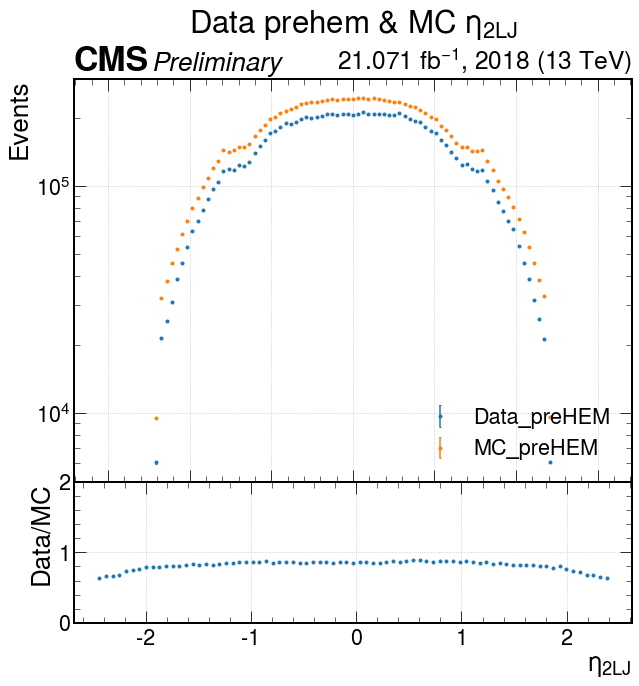

In [143]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [20, 7]})
plt.subplots_adjust(wspace=0, hspace=0)
hep.style.use("CMS")
hep.cms.label('Preliminary', data=True, loc=0, lumi=21.071, year=2018, ax=ax1)

ax1.errorbar(x=data_eta_centre_nlept, y=data_eta_stacked_nlept, yerr=np.sqrt(data_eta_stacked_nlept),   fmt='.', capsize=1, label='Data_preHEM') 
ax1.errorbar(x=mc_eta_centre_nlept, y=mc_eta_stacked_nlept, yerr=np.sqrt(mc_eta_stacked_nlept),   fmt='.', capsize=1, label='MC_preHEM') 
ax1.set_yscale('log')
ax1.grid(True)
ax1.legend(loc='lower right')
ax1.set_ylabel('Events')
ax1.set_title('Data prehem & MC $\eta_{2LJ}$', y=1.1)


ratio_eta_nlept = np.divide(data_eta_stacked_nlept,
                  mc_eta_stacked_nlept,
                  where=(mc_eta_stacked_nlept != 0))
                  
rotio_eta_nlept = ratio_eta_nlept[(mc_eta_stacked_nlept!=0) & (data_eta_stacked_nlept>15)]
edges_eta_nlept = edges_data_eta_nlept[:len(edges_data_eta_nlept)-1][(mc_eta_stacked_nlept!=0) & (data_eta_stacked_nlept>15)]

ax2.plot(edges_eta_nlept,rotio_eta_nlept,'.')
ax2.set_ylim(0,2)
ax2.grid('True')
ax2.set_xlabel('$\eta_{2LJ}$')
ax2.set_ylabel('Data/MC')
#ax2.set_xlim(0,4000)

fig.savefig('png/MC_eta_RatioPlot_nlept.png')

In [ ]:
#phi

In [46]:
qcd_phi_nlept   = [qcd_bin[n]['phi'][(qcd_bin[n]['n_electrons']==0) & (qcd_bin[n]['n_muons']==0)] for n in range(0,9)]
ttjet_phi_nlept = [ttjet_bin[n]['phi'][(ttjet_bin[n]['n_electrons']==0) & (ttjet_bin[n]['n_muons']==0)] for n in range(0,8)]
wjet_phi_nlept  = [wjet_bin[n]['phi'][(wjet_bin[n]['n_electrons']==0) & (wjet_bin[n]['n_muons']==0)] for n in range(0,5)]
zjet_phi_nlept  = [zjet_bin[n]['phi'][(zjet_bin[n]['n_electrons']==0) & (zjet_bin[n]['n_muons']==0)] for n in range(0,5)]

mc_phi_nlept = [qcd_phi_nlept, ttjet_phi_nlept, wjet_phi_nlept, zjet_phi_nlept ]

data_prehem_phi_nlept = [data_prehem[n]['phi'][(data_prehem[n]['n_electrons']==0) & (data_prehem[n]['n_muons']==0)] for n in range(0,2)]

phi_bins = np.linspace(-3.14, 3.14, 100)

fig, ax = plt.subplots(5, 1, figsize=(10,20))
fig.suptitle('MC & data_prehem $P_{T,LJ}$ with lepton veto', y=0.9)
val_mc_phi_nlept = {}
edges_mc_phi_nlept = {}
patches_mc_phi_nlept = {}

for i in range(0,4):
    val_mc_phi_nlept[i], edges_mc_phi_nlept[i], patches_mc_phi_nlept[i] = ax[i].hist(mc_phi_nlept[i], phi_bins, stacked=True, histtype='step', weights=mc_weights_arr_nlept[i], linewidth=2) 
    ax[i].set_yscale('log')
    ax[i].grid(True) 
    
mc_phi_centre_nlept = (edges_mc_phi_nlept[1][1:]+edges_mc_phi_nlept[1][:-1])/2
mc_phi_stacked_nlept = val_mc_phi_nlept[0][8]+val_mc_phi_nlept[1][7]+val_mc_phi_nlept[2][4]+val_mc_phi_nlept[3][4]

val_data_phi_nlept = {}
edges_data_phi_nlept = {}
patches_data_phi_nlept = {}


val_data_phi_nlept, edges_data_phi_nlept, patches_data_phi_nlept = ax[4].hist([data_prehem_phi_nlept[j] for j in range(0,2)], phi_bins, stacked=True, histtype='step', linewidth=2)
ax[4].set_yscale('log')
ax[4].grid(True) 
plt.close('all')
data_phi_centre_nlept = (edges_data_phi_nlept[1:]+edges_data_phi_nlept[:-1])/2
data_phi_stacked_nlept = val_data_phi_nlept[1]






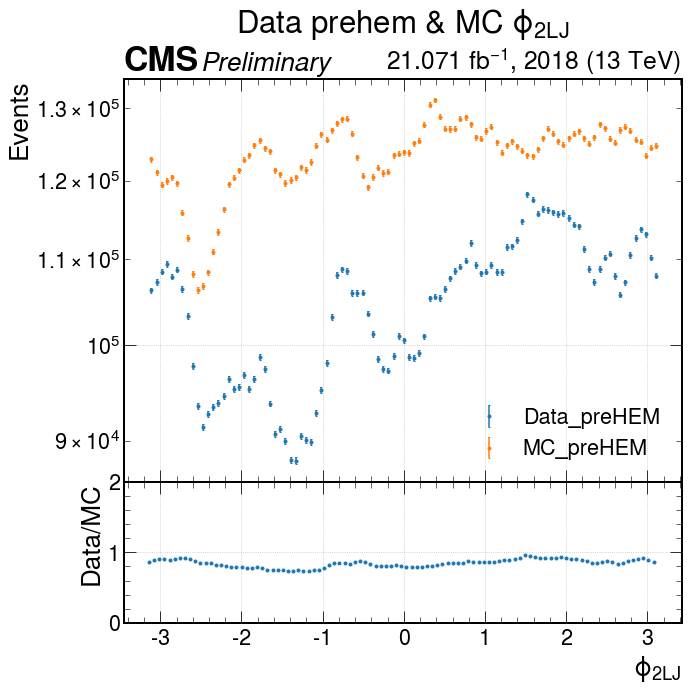

In [256]:
#hep.cms.label(loc=0, lumi=21.071, year=2018)

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [20, 7]}, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)
hep.style.use("CMS")
hep.cms.label('Preliminary', data=True, loc=0, lumi=21.071, year=2018,ax=ax1)


#hep.style.use("CMS")
ax1.errorbar(x=data_phi_centre_nlept, y=data_phi_stacked_nlept, yerr=np.sqrt(data_phi_stacked_nlept),   fmt='.', capsize=1, label='Data_preHEM') 
ax1.errorbar(x=mc_phi_centre_nlept, y=mc_phi_stacked_nlept, yerr=np.sqrt(mc_phi_stacked_nlept),   fmt='.', capsize=1, label='MC_preHEM') 
ax1.set_yscale('log')
ax1.grid(True)
ax1.legend(loc='lower right')
ax1.set_ylabel('Events')
ax1.set_title('Data prehem & MC $\phi_{2LJ}$', y=1.1)


ratio_phi_nlept = np.divide(data_phi_stacked_nlept,
                  mc_phi_stacked_nlept,
                  where=(mc_phi_stacked_nlept != 0))
                  
rotio_phi_nlept = ratio_phi_nlept[(mc_phi_stacked_nlept!=0) & (data_phi_stacked_nlept>15)]
edges_phi_nlept = edges_data_phi_nlept[:len(edges_data_phi_nlept)-1][(mc_phi_stacked_nlept!=0) & (data_phi_stacked_nlept>15)]

#ax2.plot(edges_phi_nlept,rotio_phi_nlept,'.')
ax2.errorbar(x=edges_phi_nlept, y=rotio_phi_nlept, yerr=f, fmt='.', capsize=1)
ax2.set_ylim(0,2)
ax2.grid('True')
ax2.set_xlabel('$\phi_{2LJ}$')
ax2.set_ylabel('Data/MC')
#ax2.set_xlim(0,4000)

fig.savefig('png/MC_phi_RatioPlot_nlept.png')

In [255]:
er_mc_phi

array([297.31754991, 296.14072699, 293.00386098, 293.51613665,
       294.17073889, 293.91782777, 287.03809532, 282.59047487,
       277.94977384, 279.72456993, 278.49365628, 280.52837308,
       281.76524303, 282.56594587, 287.39139265, 293.3348524 ,
       293.70557236, 294.52601234, 294.75615479, 295.7676425 ,
       299.53550439, 300.68147873, 299.54192832, 300.15796342,
       292.25917721, 294.77960576, 293.72311178, 296.854022  ,
       294.9319141 , 296.29596134, 294.79679634, 298.52096896,
       301.68289269, 304.04914185, 300.6537399 , 302.31825646,
       302.47669218, 305.19066185, 305.96910448, 302.89493762,
       296.25311622, 295.82153666, 295.37926536, 298.44135611,
       298.76332795, 294.80085449, 291.04055601, 297.60432727,
       298.94311569, 299.94211486, 298.21935708, 298.80567247,
       297.49647454, 302.03611318, 306.61946943, 305.97846393,
       301.41107527, 298.46960499, 296.57379987, 296.79170151,
       299.72793451, 300.0002248 , 297.03715575, 297.64

In [253]:
print(len(edges_phi_nlept))
print(len(rotio_phi_nlept))
print(len(er_mc_phi))

99
99
99


In [49]:
import mplhep as hep

In [179]:
n, bins, patch = plt.hist(qcd_bin[0]['pt'], bins=pt_bins, weights=qcd_weights_arr[0])
n_err = np.sqrt(plt.hist(qcd_bin[0]['pt'], bins=bins, weights=qcd_weights_arr[0]**2)[0])
plt.close('all')
#n_err = np.sqrt(np.histogram(qcd_bin[0]['pt'], bins=bins, weights=qcd_weights_arr[0]**2)[0])
#np.histogram(qcd_bin[0]['pt'], bins=bins, weights=qcd_weights_arr[0]**2)[1]

In [168]:
def mc_err(val, bins, w):
    #n, bins = np.histogram(val, bins=bins, weights=w)
    n_err = np.sqrt(np.histogram(val, bins=bins, weights=w**2)[0])
    return n_err
    
def error_ratio(data,mc,err_data,err_mc):
    dA = np.sqrt((err_data/data)**2 + (err_mc/mc)**2)*data/mc
    return dA
    

In [251]:
f = error_ratio(data_phi_stacked_nlept, mc_phi_stacked_nlept, np.sqrt(data_phi_stacked_nlept), errors_of_mc)
f

array([0.00337902, 0.00346377, 0.00354403, 0.00354756, 0.00349695,
       0.0035481 , 0.00362242, 0.00366741, 0.00370408, 0.0036906 ,
       0.00360198, 0.00357423, 0.0034881 , 0.00339785, 0.00332314,
       0.00326645, 0.00320835, 0.00318221, 0.00316107, 0.00311169,
       0.00310098, 0.00313533, 0.00314044, 0.00307478, 0.00306283,
       0.00310253, 0.00311241, 0.00306427, 0.00304468, 0.00305875,
       0.00305743, 0.00303001, 0.00303216, 0.00304144, 0.00311817,
       0.00318901, 0.00325841, 0.00326165, 0.0032587 , 0.00326492,
       0.00335763, 0.00345228, 0.00345577, 0.00336246, 0.00325478,
       0.00323887, 0.00321442, 0.00319571, 0.00324317, 0.00322978,
       0.00318467, 0.00313846, 0.00313406, 0.00311522, 0.003126  ,
       0.00310624, 0.00316659, 0.00323333, 0.00325339, 0.00327068,
       0.00324475, 0.00325434, 0.00332072, 0.00333328, 0.00333211,
       0.00330217, 0.00330378, 0.00334965, 0.00338381, 0.00342338,
       0.00341836, 0.00344654, 0.00352289, 0.00361139, 0.00359

In [224]:
n=0
for i in range(1,5):
    print(len(mc_phi_nlept[i-1]))
    for j in range(1, len(mc_phi_nlept[i-1])+1):
        n +=1
        #if i == 1: n = i*j - 1
        #if i>1: n+= 1
        print('*****', n)

9
***** 1
***** 2
***** 3
***** 4
***** 5
***** 6
***** 7
***** 8
***** 9
8
***** 10
***** 11
***** 12
***** 13
***** 14
***** 15
***** 16
***** 17
5
***** 18
***** 19
***** 20
***** 21
***** 22
5
***** 23
***** 24
***** 25
***** 26
***** 27


In [225]:
MC_xbins = {}
MC_err = {}
mc_xbin = np.zeros([27,100])
n=0
for i in range(0,4):
    print(len(mc_phi_nlept[i]))
    for j in range(0, len(mc_phi_nlept[i])):
        print('*****', n)
        #MC_xbins = mc_err(mc_phi_nlept[i][j], phi_bins, mc_weights_arr_nlept[i][j]) 
        MC_xbins[n] = np.sqrt(np.histogram(mc_phi_nlept[i][j], bins=phi_bins, weights=mc_weights_arr_nlept[i][j]**2)[0])
        n+=1
        
for i in range(0,n+1):
    MC_err_square[n] = MC_xbins[n]**2
    MC_err += np.sqrt(MC_xbins[n])

9
***** 0
***** 1
***** 2
***** 3
***** 4
***** 5
***** 6
***** 7
***** 8
8
***** 9
***** 10
***** 11
***** 12
***** 13
***** 14
***** 15
***** 16
5
***** 17
***** 18
***** 19
***** 20
***** 21
5
***** 22
***** 23
***** 24
***** 25
***** 26


In [252]:
MC_err = np.zeros(99)
MC_err_square = {}
print(n)
for i in range(0,n):
    MC_err_square[i] = (MC_xbins[i])**2
    MC_err += MC_err_square[i]
    
errors_of_mc = np.sqrt(MC_err)
errors_of_mc
#print(MC_xbins[0]**2)
#print(MC_xbins[0])
er_mc_phi = errors_of_mc[(mc_phi_stacked_nlept!=0) & (data_phi_stacked_nlept>15)]
er_mc_phi


27


array([297.31754991, 296.14072699, 293.00386098, 293.51613665,
       294.17073889, 293.91782777, 287.03809532, 282.59047487,
       277.94977384, 279.72456993, 278.49365628, 280.52837308,
       281.76524303, 282.56594587, 287.39139265, 293.3348524 ,
       293.70557236, 294.52601234, 294.75615479, 295.7676425 ,
       299.53550439, 300.68147873, 299.54192832, 300.15796342,
       292.25917721, 294.77960576, 293.72311178, 296.854022  ,
       294.9319141 , 296.29596134, 294.79679634, 298.52096896,
       301.68289269, 304.04914185, 300.6537399 , 302.31825646,
       302.47669218, 305.19066185, 305.96910448, 302.89493762,
       296.25311622, 295.82153666, 295.37926536, 298.44135611,
       298.76332795, 294.80085449, 291.04055601, 297.60432727,
       298.94311569, 299.94211486, 298.21935708, 298.80567247,
       297.49647454, 302.03611318, 306.61946943, 305.97846393,
       301.41107527, 298.46960499, 296.57379987, 296.79170151,
       299.72793451, 300.0002248 , 297.03715575, 297.64

In [235]:
MC_xbins[0]**2

array([71051.79088446, 70653.04837151, 69099.32754521, 69291.82393076,
       69477.4454454 , 69408.69673627, 66019.38537622, 64108.17126245,
       62300.08021237, 63606.30568581, 62616.32427436, 63537.55697668,
       63846.92616776, 64032.54768241, 66315.00482548, 69236.82496349,
       69229.9500926 , 69614.94286372, 69608.06799281, 70199.30689132,
       72151.77023057, 72694.88503269, 72206.76919788, 72743.00912908,
       68418.71532489, 69999.93563485, 69394.94699451, 71299.28623738,
       70006.81050576, 70776.796048  , 69965.56128028, 71931.77436136,
       73423.62134946, 74640.47350103, 72653.63580721, 73595.49312228,
       73457.99570402, 74936.09295029, 75437.95852693, 73897.98744244,
       70446.80224418, 70701.17246796, 70536.17556605, 72172.39484331,
       72124.27074692, 69855.56334568, 67614.35542808, 71237.41239916,
       71904.27487771, 72509.26351804, 71491.78262294, 71787.40207219,
       70886.79398261, 73217.37522207, 75541.08159062, 74997.9667885 ,
      

In [190]:
mc_err_perbins[0] = mc_err(mc_phi_nlept[0][1], phi_bins, mc_weights_arr_nlept[0][1]) 

TypeError: 'numpy.ndarray' object is not callable